# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 34285 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 34285) |           | Elapsed Time: 0:00:26 ETA:  10 days, 9:55:58

  0% (   82 of 34285) |                    | Elapsed Time: 0:00:27 ETA:  0:06:40

  0% (  156 of 34285) |                    | Elapsed Time: 0:00:28 ETA:  0:06:58

  0% (  231 of 34285) |                    | Elapsed Time: 0:00:29 ETA:  0:07:01

  0% (  305 of 34285) |                    | Elapsed Time: 0:00:30 ETA:  0:07:04

  1% (  380 of 34285) |                    | Elapsed Time: 0:00:31 ETA:  0:07:04

  1% (  429 of 34285) |                    | Elapsed Time: 0:00:31 ETA:  0:07:04

  1% (  449 of 34285) |                    | Elapsed Time: 0:00:32 ETA:  0:08:00

  1% (  529 of 34285) |                    | Elapsed Time: 0:00:33 ETA:  0:07:47

  1% (  606 of 34285) |                    | Elapsed Time: 0:00:34 ETA:  0:07:39

  2% (  686 of 34285) |                    | Elapsed Time: 0:00:35 ETA:  0:07:38

  2% (  766 of 34285) |                    | Elapsed Time: 0:00:36 ETA:  0:07:33

  2% (  858 of 34285) |                    | Elapsed Time: 0:00:38 ETA:  0:07:28

  2% (  936 of 34285) |                    | Elapsed Time: 0:00:39 ETA:  0:07:24

  2% ( 1017 of 34285) |                    | Elapsed Time: 0:00:40 ETA:  0:07:17

  3% ( 1098 of 34285) |                    | Elapsed Time: 0:00:41 ETA:  0:06:31

  3% ( 1182 of 34285) |                    | Elapsed Time: 0:00:42 ETA:  0:06:27

  3% ( 1263 of 34285) |                    | Elapsed Time: 0:00:43 ETA:  0:06:24

  3% ( 1286 of 34285) |                    | Elapsed Time: 0:00:43 ETA:  0:06:23

  3% ( 1361 of 34285) |                    | Elapsed Time: 0:00:44 ETA:  0:06:26

  4% ( 1426 of 34285) |                    | Elapsed Time: 0:00:45 ETA:  0:06:36

  4% ( 1493 of 34285) |                    | Elapsed Time: 0:00:46 ETA:  0:06:44

  4% ( 1560 of 34285) |                    | Elapsed Time: 0:00:47 ETA:  0:06:51

  4% ( 1626 of 34285) |                    | Elapsed Time: 0:00:48 ETA:  0:07:01

  4% ( 1692 of 34285) |                    | Elapsed Time: 0:00:49 ETA:  0:07:12

  5% ( 1715 of 34285) |#                   | Elapsed Time: 0:00:49 ETA:  0:07:24

  5% ( 1790 of 34285) |#                   | Elapsed Time: 0:00:50 ETA:  0:07:29

  5% ( 1867 of 34285) |#                   | Elapsed Time: 0:00:51 ETA:  0:07:24

  5% ( 1945 of 34285) |#                   | Elapsed Time: 0:00:52 ETA:  0:07:21

  5% ( 2024 of 34285) |#                   | Elapsed Time: 0:00:53 ETA:  0:07:08

  6% ( 2111 of 34285) |#                   | Elapsed Time: 0:00:54 ETA:  0:06:51

  6% ( 2143 of 34285) |#                   | Elapsed Time: 0:00:55 ETA:  0:06:41

  6% ( 2232 of 34285) |#                   | Elapsed Time: 0:00:56 ETA:  0:06:23

  6% ( 2321 of 34285) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:06

  7% ( 2409 of 34285) |#                   | Elapsed Time: 0:00:58 ETA:  0:05:58

  7% ( 2498 of 34285) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:48

  7% ( 2572 of 34285) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:41

  7% ( 2662 of 34285) |#                   | Elapsed Time: 0:01:01 ETA:  0:05:33

  8% ( 2747 of 34285) |#                   | Elapsed Time: 0:01:02 ETA:  0:05:28

  8% ( 2826 of 34285) |#                   | Elapsed Time: 0:01:03 ETA:  0:05:32

  8% ( 2907 of 34285) |#                   | Elapsed Time: 0:01:04 ETA:  0:05:34

  8% ( 3000 of 34285) |#                   | Elapsed Time: 0:01:05 ETA:  0:05:39

  8% ( 3080 of 34285) |#                   | Elapsed Time: 0:01:06 ETA:  0:05:43

  9% ( 3153 of 34285) |#                   | Elapsed Time: 0:01:07 ETA:  0:05:52

  9% ( 3222 of 34285) |#                   | Elapsed Time: 0:01:08 ETA:  0:06:03

  9% ( 3297 of 34285) |#                   | Elapsed Time: 0:01:09 ETA:  0:06:12

  9% ( 3368 of 34285) |#                   | Elapsed Time: 0:01:10 ETA:  0:06:21

 10% ( 3429 of 34285) |##                  | Elapsed Time: 0:01:11 ETA:  0:06:21

 10% ( 3437 of 34285) |##                  | Elapsed Time: 0:01:12 ETA:  0:07:22

 10% ( 3520 of 34285) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:19

 10% ( 3594 of 34285) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:14

 10% ( 3665 of 34285) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:21

 10% ( 3736 of 34285) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:22

 11% ( 3811 of 34285) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:16

 11% ( 3858 of 34285) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:17

 11% ( 3935 of 34285) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:11

 11% ( 4013 of 34285) |##                  | Elapsed Time: 0:01:19 ETA:  0:07:09

 11% ( 4089 of 34285) |##                  | Elapsed Time: 0:01:20 ETA:  0:06:15

 12% ( 4165 of 34285) |##                  | Elapsed Time: 0:01:21 ETA:  0:06:19

 12% ( 4242 of 34285) |##                  | Elapsed Time: 0:01:22 ETA:  0:06:15

 12% ( 4286 of 34285) |##                  | Elapsed Time: 0:01:23 ETA:  0:06:11

 12% ( 4362 of 34285) |##                  | Elapsed Time: 0:01:24 ETA:  0:06:07

 12% ( 4439 of 34285) |##                  | Elapsed Time: 0:01:25 ETA:  0:06:05

 13% ( 4517 of 34285) |##                  | Elapsed Time: 0:01:26 ETA:  0:06:03

 13% ( 4594 of 34285) |##                  | Elapsed Time: 0:01:27 ETA:  0:06:02

 13% ( 4670 of 34285) |##                  | Elapsed Time: 0:01:28 ETA:  0:06:02

 13% ( 4715 of 34285) |##                  | Elapsed Time: 0:01:28 ETA:  0:06:01

 13% ( 4793 of 34285) |##                  | Elapsed Time: 0:01:29 ETA:  0:05:59

 14% ( 4870 of 34285) |##                  | Elapsed Time: 0:01:31 ETA:  0:05:58

 14% ( 4948 of 34285) |##                  | Elapsed Time: 0:01:32 ETA:  0:05:56

 14% ( 5026 of 34285) |##                  | Elapsed Time: 0:01:33 ETA:  0:05:54

 14% ( 5103 of 34285) |##                  | Elapsed Time: 0:01:34 ETA:  0:05:52

 15% ( 5143 of 34285) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:52

 15% ( 5219 of 34285) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:52

 15% ( 5297 of 34285) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:50

 15% ( 5375 of 34285) |###                 | Elapsed Time: 0:01:37 ETA:  0:05:48

 15% ( 5453 of 34285) |###                 | Elapsed Time: 0:01:38 ETA:  0:05:47

 16% ( 5530 of 34285) |###                 | Elapsed Time: 0:01:39 ETA:  0:05:46

 16% ( 5572 of 34285) |###                 | Elapsed Time: 0:01:40 ETA:  0:05:45

 16% ( 5648 of 34285) |###                 | Elapsed Time: 0:01:41 ETA:  0:05:45

 16% ( 5726 of 34285) |###                 | Elapsed Time: 0:01:42 ETA:  0:05:44

 16% ( 5802 of 34285) |###                 | Elapsed Time: 0:01:43 ETA:  0:05:44

 17% ( 5880 of 34285) |###                 | Elapsed Time: 0:01:44 ETA:  0:05:42

 17% ( 5963 of 34285) |###                 | Elapsed Time: 0:01:45 ETA:  0:05:37

 17% ( 6000 of 34285) |###                 | Elapsed Time: 0:01:45 ETA:  0:05:35

 17% ( 6081 of 34285) |###                 | Elapsed Time: 0:01:46 ETA:  0:05:31

 17% ( 6166 of 34285) |###                 | Elapsed Time: 0:01:47 ETA:  0:05:25

 18% ( 6242 of 34285) |###                 | Elapsed Time: 0:01:48 ETA:  0:05:25

 18% ( 6321 of 34285) |###                 | Elapsed Time: 0:01:49 ETA:  0:05:22

 18% ( 6397 of 34285) |###                 | Elapsed Time: 0:01:50 ETA:  0:05:23

 18% ( 6429 of 34285) |###                 | Elapsed Time: 0:01:51 ETA:  0:05:20

 18% ( 6508 of 34285) |###                 | Elapsed Time: 0:01:52 ETA:  0:05:18

 19% ( 6587 of 34285) |###                 | Elapsed Time: 0:01:53 ETA:  0:05:20

 19% ( 6666 of 34285) |###                 | Elapsed Time: 0:01:54 ETA:  0:05:20

 19% ( 6747 of 34285) |###                 | Elapsed Time: 0:01:55 ETA:  0:05:19

 19% ( 6828 of 34285) |###                 | Elapsed Time: 0:01:56 ETA:  0:05:20

 20% ( 6857 of 34285) |####                | Elapsed Time: 0:01:56 ETA:  0:05:18

 20% ( 6937 of 34285) |####                | Elapsed Time: 0:01:57 ETA:  0:05:16

 20% ( 7015 of 34285) |####                | Elapsed Time: 0:01:58 ETA:  0:05:13

 20% ( 7094 of 34285) |####                | Elapsed Time: 0:01:59 ETA:  0:05:13

 20% ( 7174 of 34285) |####                | Elapsed Time: 0:02:00 ETA:  0:05:11

 20% ( 7181 of 34285) |####                | Elapsed Time: 0:02:01 ETA:  0:06:16

 21% ( 7259 of 34285) |####                | Elapsed Time: 0:02:02 ETA:  0:06:16

 21% ( 7286 of 34285) |####                | Elapsed Time: 0:02:03 ETA:  0:06:27

 21% ( 7364 of 34285) |####                | Elapsed Time: 0:02:04 ETA:  0:06:29

 21% ( 7445 of 34285) |####                | Elapsed Time: 0:02:05 ETA:  0:06:21

 21% ( 7526 of 34285) |####                | Elapsed Time: 0:02:06 ETA:  0:06:18

 22% ( 7607 of 34285) |####                | Elapsed Time: 0:02:07 ETA:  0:06:15

 22% ( 7685 of 34285) |####                | Elapsed Time: 0:02:08 ETA:  0:06:15

 22% ( 7715 of 34285) |####                | Elapsed Time: 0:02:08 ETA:  0:06:21

 22% ( 7794 of 34285) |####                | Elapsed Time: 0:02:09 ETA:  0:05:07

 22% ( 7875 of 34285) |####                | Elapsed Time: 0:02:10 ETA:  0:05:04

 23% ( 7958 of 34285) |####                | Elapsed Time: 0:02:11 ETA:  0:04:58

 23% ( 8040 of 34285) |####                | Elapsed Time: 0:02:12 ETA:  0:04:54

 23% ( 8123 of 34285) |####                | Elapsed Time: 0:02:13 ETA:  0:04:52

 23% ( 8143 of 34285) |####                | Elapsed Time: 0:02:13 ETA:  0:04:52

 23% ( 8223 of 34285) |####                | Elapsed Time: 0:02:14 ETA:  0:04:52

 24% ( 8302 of 34285) |####                | Elapsed Time: 0:02:15 ETA:  0:04:50

 24% ( 8381 of 34285) |####                | Elapsed Time: 0:02:16 ETA:  0:04:50

 24% ( 8460 of 34285) |####                | Elapsed Time: 0:02:17 ETA:  0:04:49

 24% ( 8537 of 34285) |####                | Elapsed Time: 0:02:18 ETA:  0:04:51

 25% ( 8572 of 34285) |#####               | Elapsed Time: 0:02:19 ETA:  0:04:54

 25% ( 8653 of 34285) |#####               | Elapsed Time: 0:02:20 ETA:  0:04:54

 25% ( 8728 of 34285) |#####               | Elapsed Time: 0:02:21 ETA:  0:04:58

 25% ( 8800 of 34285) |#####               | Elapsed Time: 0:02:22 ETA:  0:05:01

 25% ( 8872 of 34285) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:05

 26% ( 8945 of 34285) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:08

 26% ( 9000 of 34285) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:12

 26% ( 9077 of 34285) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:13

 26% ( 9154 of 34285) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:12

 26% ( 9227 of 34285) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:13

 27% ( 9301 of 34285) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:16

 27% ( 9376 of 34285) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:16

 27% ( 9429 of 34285) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:14

 27% ( 9505 of 34285) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:09

 27% ( 9583 of 34285) |#####               | Elapsed Time: 0:02:32 ETA:  0:05:05

 28% ( 9666 of 34285) |#####               | Elapsed Time: 0:02:33 ETA:  0:04:57

 28% ( 9748 of 34285) |#####               | Elapsed Time: 0:02:34 ETA:  0:04:53

 28% ( 9829 of 34285) |#####               | Elapsed Time: 0:02:35 ETA:  0:04:49

 28% ( 9857 of 34285) |#####               | Elapsed Time: 0:02:36 ETA:  0:04:45

 28% ( 9938 of 34285) |#####               | Elapsed Time: 0:02:37 ETA:  0:04:39

 29% (10020 of 34285) |#####               | Elapsed Time: 0:02:38 ETA:  0:04:33

 29% (10101 of 34285) |#####               | Elapsed Time: 0:02:39 ETA:  0:04:29

 29% (10179 of 34285) |#####               | Elapsed Time: 0:02:40 ETA:  0:04:27

 29% (10254 of 34285) |#####               | Elapsed Time: 0:02:41 ETA:  0:04:28

 30% (10286 of 34285) |######              | Elapsed Time: 0:02:41 ETA:  0:04:31

 30% (10364 of 34285) |######              | Elapsed Time: 0:02:42 ETA:  0:04:33

 30% (10444 of 34285) |######              | Elapsed Time: 0:02:43 ETA:  0:04:32

 30% (10522 of 34285) |######              | Elapsed Time: 0:02:44 ETA:  0:04:32

 30% (10599 of 34285) |######              | Elapsed Time: 0:02:45 ETA:  0:04:34

 31% (10677 of 34285) |######              | Elapsed Time: 0:02:46 ETA:  0:04:35

 31% (10715 of 34285) |######              | Elapsed Time: 0:02:47 ETA:  0:04:36

 31% (10792 of 34285) |######              | Elapsed Time: 0:02:48 ETA:  0:04:36

 31% (10869 of 34285) |######              | Elapsed Time: 0:02:49 ETA:  0:04:33

 31% (10946 of 34285) |######              | Elapsed Time: 0:02:50 ETA:  0:04:31

 32% (11028 of 34285) |######              | Elapsed Time: 0:02:51 ETA:  0:04:28

 32% (11113 of 34285) |######              | Elapsed Time: 0:02:52 ETA:  0:04:23

 32% (11143 of 34285) |######              | Elapsed Time: 0:02:52 ETA:  0:04:21

 32% (11227 of 34285) |######              | Elapsed Time: 0:02:53 ETA:  0:04:15

 32% (11312 of 34285) |######              | Elapsed Time: 0:02:54 ETA:  0:04:09

 33% (11396 of 34285) |######              | Elapsed Time: 0:02:55 ETA:  0:04:06

 33% (11481 of 34285) |######              | Elapsed Time: 0:02:56 ETA:  0:04:01

 33% (11572 of 34285) |######              | Elapsed Time: 0:02:57 ETA:  0:03:51

 33% (11656 of 34285) |######              | Elapsed Time: 0:02:58 ETA:  0:03:48

 34% (11741 of 34285) |######              | Elapsed Time: 0:02:59 ETA:  0:03:47

 34% (11797 of 34285) |######              | Elapsed Time: 0:03:01 ETA:  0:05:09

 34% (11872 of 34285) |######              | Elapsed Time: 0:03:02 ETA:  0:05:15

 34% (11945 of 34285) |######              | Elapsed Time: 0:03:03 ETA:  0:05:23

 35% (12000 of 34285) |#######             | Elapsed Time: 0:03:04 ETA:  0:05:30

 35% (12081 of 34285) |#######             | Elapsed Time: 0:03:05 ETA:  0:05:32

 35% (12161 of 34285) |#######             | Elapsed Time: 0:03:06 ETA:  0:05:36

 35% (12244 of 34285) |#######             | Elapsed Time: 0:03:07 ETA:  0:05:22

 35% (12327 of 34285) |#######             | Elapsed Time: 0:03:08 ETA:  0:05:22

 36% (12410 of 34285) |#######             | Elapsed Time: 0:03:09 ETA:  0:05:23

 36% (12429 of 34285) |#######             | Elapsed Time: 0:03:09 ETA:  0:04:03

 36% (12509 of 34285) |#######             | Elapsed Time: 0:03:10 ETA:  0:03:58

 36% (12587 of 34285) |#######             | Elapsed Time: 0:03:11 ETA:  0:03:54

 36% (12662 of 34285) |#######             | Elapsed Time: 0:03:12 ETA:  0:03:55

 37% (12737 of 34285) |#######             | Elapsed Time: 0:03:13 ETA:  0:03:58

 37% (12811 of 34285) |#######             | Elapsed Time: 0:03:14 ETA:  0:04:01

 37% (12857 of 34285) |#######             | Elapsed Time: 0:03:15 ETA:  0:04:04

 37% (12934 of 34285) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:08

 37% (13011 of 34285) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:11

 38% (13090 of 34285) |#######             | Elapsed Time: 0:03:18 ETA:  0:04:09

 38% (13172 of 34285) |#######             | Elapsed Time: 0:03:19 ETA:  0:04:07

 38% (13257 of 34285) |#######             | Elapsed Time: 0:03:20 ETA:  0:04:02

 38% (13286 of 34285) |#######             | Elapsed Time: 0:03:20 ETA:  0:03:59

 38% (13367 of 34285) |#######             | Elapsed Time: 0:03:21 ETA:  0:03:54

 39% (13450 of 34285) |#######             | Elapsed Time: 0:03:22 ETA:  0:03:46

 39% (13534 of 34285) |#######             | Elapsed Time: 0:03:23 ETA:  0:03:42

 39% (13616 of 34285) |#######             | Elapsed Time: 0:03:24 ETA:  0:03:38

 39% (13696 of 34285) |#######             | Elapsed Time: 0:03:25 ETA:  0:03:35

 40% (13714 of 34285) |########            | Elapsed Time: 0:03:26 ETA:  0:03:37

 40% (13777 of 34285) |########            | Elapsed Time: 0:03:27 ETA:  0:03:50

 40% (13852 of 34285) |########            | Elapsed Time: 0:03:28 ETA:  0:03:56

 40% (13928 of 34285) |########            | Elapsed Time: 0:03:29 ETA:  0:03:57

 40% (14003 of 34285) |########            | Elapsed Time: 0:03:30 ETA:  0:04:00

 41% (14080 of 34285) |########            | Elapsed Time: 0:03:31 ETA:  0:04:03

 41% (14143 of 34285) |########            | Elapsed Time: 0:03:32 ETA:  0:04:05

 41% (14220 of 34285) |########            | Elapsed Time: 0:03:33 ETA:  0:04:08

 41% (14296 of 34285) |########            | Elapsed Time: 0:03:34 ETA:  0:04:10

 41% (14371 of 34285) |########            | Elapsed Time: 0:03:35 ETA:  0:04:06

 42% (14454 of 34285) |########            | Elapsed Time: 0:03:36 ETA:  0:03:51

 42% (14534 of 34285) |########            | Elapsed Time: 0:03:37 ETA:  0:03:47

 42% (14572 of 34285) |########            | Elapsed Time: 0:03:37 ETA:  0:03:48

 42% (14652 of 34285) |########            | Elapsed Time: 0:03:38 ETA:  0:03:43

 42% (14733 of 34285) |########            | Elapsed Time: 0:03:39 ETA:  0:03:39

 43% (14814 of 34285) |########            | Elapsed Time: 0:03:40 ETA:  0:03:39

 43% (14892 of 34285) |########            | Elapsed Time: 0:03:41 ETA:  0:03:37

 43% (14965 of 34285) |########            | Elapsed Time: 0:03:42 ETA:  0:03:38

 43% (15000 of 34285) |########            | Elapsed Time: 0:03:43 ETA:  0:03:37

 43% (15077 of 34285) |########            | Elapsed Time: 0:03:44 ETA:  0:03:41

 44% (15159 of 34285) |########            | Elapsed Time: 0:03:45 ETA:  0:03:38

 44% (15243 of 34285) |########            | Elapsed Time: 0:03:46 ETA:  0:03:30

 44% (15323 of 34285) |########            | Elapsed Time: 0:03:47 ETA:  0:03:30

 44% (15403 of 34285) |########            | Elapsed Time: 0:03:48 ETA:  0:03:30

 45% (15429 of 34285) |#########           | Elapsed Time: 0:03:48 ETA:  0:03:31

 45% (15506 of 34285) |#########           | Elapsed Time: 0:03:49 ETA:  0:03:30

 45% (15584 of 34285) |#########           | Elapsed Time: 0:03:50 ETA:  0:03:26

 45% (15665 of 34285) |#########           | Elapsed Time: 0:03:51 ETA:  0:03:22

 45% (15745 of 34285) |#########           | Elapsed Time: 0:03:52 ETA:  0:03:19

 46% (15822 of 34285) |#########           | Elapsed Time: 0:03:53 ETA:  0:03:21

 46% (15857 of 34285) |#########           | Elapsed Time: 0:03:54 ETA:  0:03:25

 46% (15935 of 34285) |#########           | Elapsed Time: 0:03:55 ETA:  0:03:25

 46% (16012 of 34285) |#########           | Elapsed Time: 0:03:56 ETA:  0:03:26

 46% (16090 of 34285) |#########           | Elapsed Time: 0:03:57 ETA:  0:03:25

 47% (16168 of 34285) |#########           | Elapsed Time: 0:03:58 ETA:  0:03:23

 47% (16244 of 34285) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:24

 47% (16286 of 34285) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:25

 47% (16361 of 34285) |#########           | Elapsed Time: 0:04:00 ETA:  0:03:27

 47% (16441 of 34285) |#########           | Elapsed Time: 0:04:01 ETA:  0:03:24

 48% (16521 of 34285) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:21

 48% (16600 of 34285) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:19

 48% (16679 of 34285) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:17

 48% (16714 of 34285) |#########           | Elapsed Time: 0:04:05 ETA:  0:03:16

 48% (16797 of 34285) |#########           | Elapsed Time: 0:04:06 ETA:  0:03:11

 49% (16875 of 34285) |#########           | Elapsed Time: 0:04:07 ETA:  0:03:09

 49% (16948 of 34285) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:11

 49% (17022 of 34285) |#########           | Elapsed Time: 0:04:09 ETA:  0:03:10

 49% (17107 of 34285) |#########           | Elapsed Time: 0:04:10 ETA:  0:03:06

 50% (17143 of 34285) |##########          | Elapsed Time: 0:04:10 ETA:  0:03:04

 50% (17226 of 34285) |##########          | Elapsed Time: 0:04:11 ETA:  0:03:00

 50% (17310 of 34285) |##########          | Elapsed Time: 0:04:12 ETA:  0:02:56

 50% (17396 of 34285) |##########          | Elapsed Time: 0:04:13 ETA:  0:02:52

 50% (17446 of 34285) |##########          | Elapsed Time: 0:04:16 ETA:  0:04:27

 51% (17526 of 34285) |##########          | Elapsed Time: 0:04:17 ETA:  0:04:24

 51% (17572 of 34285) |##########          | Elapsed Time: 0:04:17 ETA:  0:04:25

 51% (17652 of 34285) |##########          | Elapsed Time: 0:04:18 ETA:  0:04:19

 51% (17729 of 34285) |##########          | Elapsed Time: 0:04:19 ETA:  0:04:25

 51% (17811 of 34285) |##########          | Elapsed Time: 0:04:20 ETA:  0:04:19

 52% (17888 of 34285) |##########          | Elapsed Time: 0:04:21 ETA:  0:04:23

 52% (17963 of 34285) |##########          | Elapsed Time: 0:04:22 ETA:  0:04:29

 52% (18000 of 34285) |##########          | Elapsed Time: 0:04:23 ETA:  0:04:45

 52% (18079 of 34285) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:00

 52% (18159 of 34285) |##########          | Elapsed Time: 0:04:25 ETA:  0:02:59

 53% (18243 of 34285) |##########          | Elapsed Time: 0:04:26 ETA:  0:02:53

 53% (18326 of 34285) |##########          | Elapsed Time: 0:04:27 ETA:  0:02:50

 53% (18405 of 34285) |##########          | Elapsed Time: 0:04:28 ETA:  0:02:48

 53% (18429 of 34285) |##########          | Elapsed Time: 0:04:28 ETA:  0:02:50

 53% (18507 of 34285) |##########          | Elapsed Time: 0:04:29 ETA:  0:02:48

 54% (18585 of 34285) |##########          | Elapsed Time: 0:04:30 ETA:  0:02:45

 54% (18667 of 34285) |##########          | Elapsed Time: 0:04:31 ETA:  0:02:39

 54% (18750 of 34285) |##########          | Elapsed Time: 0:04:32 ETA:  0:02:35

 54% (18832 of 34285) |##########          | Elapsed Time: 0:04:33 ETA:  0:02:33

 55% (18857 of 34285) |###########         | Elapsed Time: 0:04:33 ETA:  0:02:34

 55% (18939 of 34285) |###########         | Elapsed Time: 0:04:34 ETA:  0:02:33

 55% (19021 of 34285) |###########         | Elapsed Time: 0:04:35 ETA:  0:02:30

 55% (19101 of 34285) |###########         | Elapsed Time: 0:04:36 ETA:  0:02:28

 55% (19182 of 34285) |###########         | Elapsed Time: 0:04:37 ETA:  0:02:25

 56% (19252 of 34285) |###########         | Elapsed Time: 0:04:38 ETA:  0:02:30

 56% (19286 of 34285) |###########         | Elapsed Time: 0:04:39 ETA:  0:02:31

 56% (19364 of 34285) |###########         | Elapsed Time: 0:04:40 ETA:  0:02:34

 56% (19441 of 34285) |###########         | Elapsed Time: 0:04:41 ETA:  0:02:37

 56% (19503 of 34285) |###########         | Elapsed Time: 0:04:42 ETA:  0:02:48

 57% (19564 of 34285) |###########         | Elapsed Time: 0:04:43 ETA:  0:03:02

 57% (19640 of 34285) |###########         | Elapsed Time: 0:04:44 ETA:  0:03:06

 57% (19714 of 34285) |###########         | Elapsed Time: 0:04:45 ETA:  0:03:18

 57% (19788 of 34285) |###########         | Elapsed Time: 0:04:46 ETA:  0:03:13

 57% (19870 of 34285) |###########         | Elapsed Time: 0:04:47 ETA:  0:03:06

 58% (19952 of 34285) |###########         | Elapsed Time: 0:04:48 ETA:  0:03:01

 58% (20035 of 34285) |###########         | Elapsed Time: 0:04:49 ETA:  0:02:56

 58% (20118 of 34285) |###########         | Elapsed Time: 0:04:50 ETA:  0:02:39

 58% (20143 of 34285) |###########         | Elapsed Time: 0:04:50 ETA:  0:02:25

 58% (20223 of 34285) |###########         | Elapsed Time: 0:04:51 ETA:  0:02:21

 59% (20300 of 34285) |###########         | Elapsed Time: 0:04:52 ETA:  0:02:17

 59% (20371 of 34285) |###########         | Elapsed Time: 0:04:53 ETA:  0:02:22

 59% (20453 of 34285) |###########         | Elapsed Time: 0:04:54 ETA:  0:02:15

 59% (20536 of 34285) |###########         | Elapsed Time: 0:04:55 ETA:  0:02:13

 60% (20571 of 34285) |############        | Elapsed Time: 0:04:56 ETA:  0:02:14

 60% (20648 of 34285) |############        | Elapsed Time: 0:04:57 ETA:  0:02:17

 60% (20727 of 34285) |############        | Elapsed Time: 0:04:58 ETA:  0:02:19

 60% (20812 of 34285) |############        | Elapsed Time: 0:04:59 ETA:  0:02:14

 60% (20892 of 34285) |############        | Elapsed Time: 0:05:00 ETA:  0:02:14

 61% (20975 of 34285) |############        | Elapsed Time: 0:05:01 ETA:  0:02:09

 61% (21000 of 34285) |############        | Elapsed Time: 0:05:01 ETA:  0:02:02

 61% (21084 of 34285) |############        | Elapsed Time: 0:05:02 ETA:  0:01:59

 61% (21168 of 34285) |############        | Elapsed Time: 0:05:03 ETA:  0:01:58

 61% (21252 of 34285) |############        | Elapsed Time: 0:05:04 ETA:  0:01:55

 62% (21327 of 34285) |############        | Elapsed Time: 0:05:05 ETA:  0:01:55

 62% (21409 of 34285) |############        | Elapsed Time: 0:05:06 ETA:  0:01:52

 62% (21429 of 34285) |############        | Elapsed Time: 0:05:06 ETA:  0:01:55

 62% (21510 of 34285) |############        | Elapsed Time: 0:05:07 ETA:  0:01:53

 62% (21591 of 34285) |############        | Elapsed Time: 0:05:08 ETA:  0:01:54

 63% (21664 of 34285) |############        | Elapsed Time: 0:05:09 ETA:  0:01:58

 63% (21740 of 34285) |############        | Elapsed Time: 0:05:10 ETA:  0:02:03

 63% (21821 of 34285) |############        | Elapsed Time: 0:05:11 ETA:  0:02:04

 63% (21857 of 34285) |############        | Elapsed Time: 0:05:12 ETA:  0:02:10

 63% (21940 of 34285) |############        | Elapsed Time: 0:05:13 ETA:  0:02:04

 64% (22023 of 34285) |############        | Elapsed Time: 0:05:14 ETA:  0:02:02

 64% (22106 of 34285) |############        | Elapsed Time: 0:05:15 ETA:  0:01:58

 64% (22186 of 34285) |############        | Elapsed Time: 0:05:16 ETA:  0:01:57

 64% (22268 of 34285) |############        | Elapsed Time: 0:05:17 ETA:  0:01:56

 65% (22286 of 34285) |#############       | Elapsed Time: 0:05:17 ETA:  0:01:51

 65% (22368 of 34285) |#############       | Elapsed Time: 0:05:18 ETA:  0:01:46

 65% (22452 of 34285) |#############       | Elapsed Time: 0:05:19 ETA:  0:01:43

 65% (22534 of 34285) |#############       | Elapsed Time: 0:05:20 ETA:  0:01:38

 65% (22608 of 34285) |#############       | Elapsed Time: 0:05:21 ETA:  0:01:43

 66% (22675 of 34285) |#############       | Elapsed Time: 0:05:22 ETA:  0:01:52

 66% (22714 of 34285) |#############       | Elapsed Time: 0:05:23 ETA:  0:01:52

 66% (22796 of 34285) |#############       | Elapsed Time: 0:05:24 ETA:  0:01:49

 66% (22878 of 34285) |#############       | Elapsed Time: 0:05:25 ETA:  0:01:48

 66% (22961 of 34285) |#############       | Elapsed Time: 0:05:26 ETA:  0:01:45

 67% (23039 of 34285) |#############       | Elapsed Time: 0:05:27 ETA:  0:01:47

 67% (23119 of 34285) |#############       | Elapsed Time: 0:05:28 ETA:  0:01:49

 67% (23143 of 34285) |#############       | Elapsed Time: 0:05:28 ETA:  0:01:49

 67% (23227 of 34285) |#############       | Elapsed Time: 0:05:29 ETA:  0:01:40

 67% (23311 of 34285) |#############       | Elapsed Time: 0:05:30 ETA:  0:01:28

 68% (23395 of 34285) |#############       | Elapsed Time: 0:05:31 ETA:  0:01:27

 68% (23476 of 34285) |#############       | Elapsed Time: 0:05:32 ETA:  0:01:27

 68% (23555 of 34285) |#############       | Elapsed Time: 0:05:33 ETA:  0:01:27

 68% (23571 of 34285) |#############       | Elapsed Time: 0:05:33 ETA:  0:01:28

 68% (23654 of 34285) |#############       | Elapsed Time: 0:05:34 ETA:  0:01:24

 69% (23737 of 34285) |#############       | Elapsed Time: 0:05:35 ETA:  0:01:21

 69% (23825 of 34285) |#############       | Elapsed Time: 0:05:36 ETA:  0:01:17

 69% (23909 of 34285) |#############       | Elapsed Time: 0:05:37 ETA:  0:01:16

 70% (24000 of 34285) |##############      | Elapsed Time: 0:05:38 ETA:  0:01:15

 70% (24079 of 34285) |##############      | Elapsed Time: 0:05:39 ETA:  0:01:17

 70% (24155 of 34285) |##############      | Elapsed Time: 0:05:40 ETA:  0:01:18

 70% (24233 of 34285) |##############      | Elapsed Time: 0:05:41 ETA:  0:01:19

 70% (24314 of 34285) |##############      | Elapsed Time: 0:05:42 ETA:  0:01:19

 71% (24397 of 34285) |##############      | Elapsed Time: 0:05:43 ETA:  0:01:19

 71% (24429 of 34285) |##############      | Elapsed Time: 0:05:44 ETA:  0:01:23

 71% (24430 of 34285) |##############      | Elapsed Time: 0:05:46 ETA:  0:03:59

 71% (24504 of 34285) |##############      | Elapsed Time: 0:05:47 ETA:  0:04:09

 71% (24568 of 34285) |##############      | Elapsed Time: 0:05:48 ETA:  0:04:04

 71% (24649 of 34285) |##############      | Elapsed Time: 0:05:49 ETA:  0:04:01

 72% (24728 of 34285) |##############      | Elapsed Time: 0:05:50 ETA:  0:03:56

 72% (24809 of 34285) |##############      | Elapsed Time: 0:05:51 ETA:  0:03:52

 72% (24857 of 34285) |##############      | Elapsed Time: 0:05:52 ETA:  0:04:00

 72% (24937 of 34285) |##############      | Elapsed Time: 0:05:53 ETA:  0:04:02

 72% (25018 of 34285) |##############      | Elapsed Time: 0:05:54 ETA:  0:03:47

 73% (25099 of 34285) |##############      | Elapsed Time: 0:05:55 ETA:  0:01:26

 73% (25179 of 34285) |##############      | Elapsed Time: 0:05:56 ETA:  0:01:21

 73% (25263 of 34285) |##############      | Elapsed Time: 0:05:57 ETA:  0:01:08

 73% (25286 of 34285) |##############      | Elapsed Time: 0:05:57 ETA:  0:01:08

 74% (25371 of 34285) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:03

 74% (25455 of 34285) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:00

 74% (25535 of 34285) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:01

 74% (25615 of 34285) |##############      | Elapsed Time: 0:06:01 ETA:  0:01:00

 74% (25697 of 34285) |##############      | Elapsed Time: 0:06:02 ETA:  0:00:58

 75% (25714 of 34285) |###############     | Elapsed Time: 0:06:02 ETA:  0:00:58

 75% (25797 of 34285) |###############     | Elapsed Time: 0:06:03 ETA:  0:00:55

 75% (25883 of 34285) |###############     | Elapsed Time: 0:06:04 ETA:  0:00:53

 75% (25963 of 34285) |###############     | Elapsed Time: 0:06:05 ETA:  0:00:53

 75% (26046 of 34285) |###############     | Elapsed Time: 0:06:06 ETA:  0:00:53

 76% (26143 of 34285) |###############     | Elapsed Time: 0:06:08 ETA:  0:00:50

 76% (26232 of 34285) |###############     | Elapsed Time: 0:06:09 ETA:  0:00:43

 76% (26314 of 34285) |###############     | Elapsed Time: 0:06:10 ETA:  0:00:42

 76% (26394 of 34285) |###############     | Elapsed Time: 0:06:11 ETA:  0:00:42

 77% (26476 of 34285) |###############     | Elapsed Time: 0:06:12 ETA:  0:00:42

 77% (26571 of 34285) |###############     | Elapsed Time: 0:06:13 ETA:  0:00:39

 77% (26650 of 34285) |###############     | Elapsed Time: 0:06:14 ETA:  0:00:41

 77% (26730 of 34285) |###############     | Elapsed Time: 0:06:15 ETA:  0:00:42

 78% (26814 of 34285) |###############     | Elapsed Time: 0:06:16 ETA:  0:00:40

 78% (26888 of 34285) |###############     | Elapsed Time: 0:06:17 ETA:  0:00:49

 78% (26965 of 34285) |###############     | Elapsed Time: 0:06:18 ETA:  0:00:52

 78% (27000 of 34285) |###############     | Elapsed Time: 0:06:18 ETA:  0:00:50

 78% (27082 of 34285) |###############     | Elapsed Time: 0:06:19 ETA:  0:00:48

 79% (27161 of 34285) |###############     | Elapsed Time: 0:06:20 ETA:  0:00:51

 79% (27238 of 34285) |###############     | Elapsed Time: 0:06:21 ETA:  0:00:52

 79% (27319 of 34285) |###############     | Elapsed Time: 0:06:22 ETA:  0:00:50

 79% (27397 of 34285) |###############     | Elapsed Time: 0:06:23 ETA:  0:00:51

 80% (27428 of 34285) |################    | Elapsed Time: 0:06:24 ETA:  0:00:55

 80% (27509 of 34285) |################    | Elapsed Time: 0:06:25 ETA:  0:00:49

 80% (27587 of 34285) |################    | Elapsed Time: 0:06:26 ETA:  0:00:48

 80% (27666 of 34285) |################    | Elapsed Time: 0:06:27 ETA:  0:00:48

 80% (27744 of 34285) |################    | Elapsed Time: 0:06:28 ETA:  0:00:50

 81% (27821 of 34285) |################    | Elapsed Time: 0:06:29 ETA:  0:00:50

 81% (27857 of 34285) |################    | Elapsed Time: 0:06:29 ETA:  0:00:48

 81% (27935 of 34285) |################    | Elapsed Time: 0:06:30 ETA:  0:00:50

 81% (28021 of 34285) |################    | Elapsed Time: 0:06:31 ETA:  0:00:43

 81% (28105 of 34285) |################    | Elapsed Time: 0:06:32 ETA:  0:00:38

 82% (28174 of 34285) |################    | Elapsed Time: 0:06:33 ETA:  0:00:44

 82% (28248 of 34285) |################    | Elapsed Time: 0:06:34 ETA:  0:00:46

 82% (28286 of 34285) |################    | Elapsed Time: 0:06:35 ETA:  0:00:44

 82% (28368 of 34285) |################    | Elapsed Time: 0:06:36 ETA:  0:00:41

 82% (28440 of 34285) |################    | Elapsed Time: 0:06:37 ETA:  0:00:44

 83% (28519 of 34285) |################    | Elapsed Time: 0:06:38 ETA:  0:00:42

 83% (28601 of 34285) |################    | Elapsed Time: 0:06:39 ETA:  0:00:39

 83% (28677 of 34285) |################    | Elapsed Time: 0:06:40 ETA:  0:00:45

 83% (28714 of 34285) |################    | Elapsed Time: 0:06:40 ETA:  0:00:50

 83% (28797 of 34285) |################    | Elapsed Time: 0:06:41 ETA:  0:00:39

 84% (28876 of 34285) |################    | Elapsed Time: 0:06:42 ETA:  0:00:34

 84% (28952 of 34285) |################    | Elapsed Time: 0:06:43 ETA:  0:00:36

 84% (29030 of 34285) |################    | Elapsed Time: 0:06:44 ETA:  0:00:37

 84% (29113 of 34285) |################    | Elapsed Time: 0:06:45 ETA:  0:00:29

 85% (29143 of 34285) |#################   | Elapsed Time: 0:06:46 ETA:  0:00:36

 85% (29227 of 34285) |#################   | Elapsed Time: 0:06:47 ETA:  0:00:33

 85% (29303 of 34285) |#################   | Elapsed Time: 0:06:48 ETA:  0:00:32

 85% (29383 of 34285) |#################   | Elapsed Time: 0:06:49 ETA:  0:00:29

 85% (29459 of 34285) |#################   | Elapsed Time: 0:06:50 ETA:  0:00:32

 86% (29535 of 34285) |#################   | Elapsed Time: 0:06:51 ETA:  0:00:34

 86% (29571 of 34285) |#################   | Elapsed Time: 0:06:51 ETA:  0:00:30

 86% (29652 of 34285) |#################   | Elapsed Time: 0:06:52 ETA:  0:00:27

 86% (29730 of 34285) |#################   | Elapsed Time: 0:06:53 ETA:  0:00:30

 86% (29810 of 34285) |#################   | Elapsed Time: 0:06:54 ETA:  0:00:21

 87% (29893 of 34285) |#################   | Elapsed Time: 0:06:55 ETA:  0:00:20

 87% (29968 of 34285) |#################   | Elapsed Time: 0:06:56 ETA:  0:00:20

 87% (30000 of 34285) |#################   | Elapsed Time: 0:06:56 ETA:  0:00:19

 87% (30081 of 34285) |#################   | Elapsed Time: 0:06:57 ETA:  0:00:15

 87% (30163 of 34285) |#################   | Elapsed Time: 0:06:58 ETA:  0:00:09

 88% (30244 of 34285) |#################   | Elapsed Time: 0:06:59 ETA:  0:00:09

 88% (30322 of 34285) |#################   | Elapsed Time: 0:07:00 ETA:  0:00:10

 88% (30403 of 34285) |#################   | Elapsed Time: 0:07:01 ETA:  0:00:07

 88% (30428 of 34285) |#################   | Elapsed Time: 0:07:02 ETA:  0:00:08

 88% (30510 of 34285) |#################   | Elapsed Time: 0:07:03 ETA:  0:00:07

 89% (30592 of 34285) |#################   | Elapsed Time: 0:07:04 ETA:  0:00:02

 89% (30670 of 34285) |#################   | Elapsed Time: 0:07:05 ETA:  0:00:03

 89% (30738 of 34285) |#################   | Elapsed Time: 0:07:06 ETA:  0:00:10

 89% (30815 of 34285) |#################   | Elapsed Time: 0:07:07 ETA:  0:00:13

 90% (30857 of 34285) |##################  | Elapsed Time: 0:07:07 ETA:  0:00:13

 90% (30935 of 34285) |##################  | Elapsed Time: 0:07:08 ETA:  0:00:13

 90% (31012 of 34285) |##################  | Elapsed Time: 0:07:09 ETA:  0:00:14

 90% (31090 of 34285) |##################  | Elapsed Time: 0:07:10 ETA:  0:00:13

 90% (31169 of 34285) |##################  | Elapsed Time: 0:07:11 ETA:  0:00:14

 91% (31247 of 34285) |##################  | Elapsed Time: 0:07:12 ETA:  0:00:15

 91% (31286 of 34285) |##################  | Elapsed Time: 0:07:13 ETA:  0:00:14

 91% (31364 of 34285) |##################  | Elapsed Time: 0:07:14 ETA:  0:00:06

 91% (31441 of 34285) |##################  | Elapsed Time: 0:07:15 ETA:  0:00:05

 91% (31518 of 34285) |##################  | Elapsed Time: 0:07:16 ETA:  0:00:06

 92% (31590 of 34285) |##################  | Elapsed Time: 0:07:17 ETA:  0:00:09

 92% (31671 of 34285) |##################  | Elapsed Time: 0:07:18 ETA:  0:00:06

 92% (31714 of 34285) |##################  | Elapsed Time: 0:07:19 ETA:  0:00:06

 92% (31796 of 34285) |##################  | Elapsed Time: 0:07:20 ETA:  0:00:02

 92% (31876 of 34285) |##################  | Elapsed Time: 0:07:21 ETA:  0:00:00

 93% (31957 of 34285) |##################  | Elapsed Time: 0:07:22 ETA:  0:00:00

 93% (32040 of 34285) |##################  | Elapsed Time: 0:07:23 ETA:  0:00:00

 93% (32121 of 34285) |##################  | Elapsed Time: 0:07:24 ETA:  0:00:00

 93% (32143 of 34285) |##################  | Elapsed Time: 0:07:24 ETA:  0:00:00

 93% (32222 of 34285) |##################  | Elapsed Time: 0:07:25 ETA:  0:00:00

 94% (32300 of 34285) |##################  | Elapsed Time: 0:07:26 ETA:  0:00:00

 94% (32380 of 34285) |##################  | Elapsed Time: 0:07:27 ETA:  0:00:00

 94% (32459 of 34285) |##################  | Elapsed Time: 0:07:28 ETA:  0:00:00

 94% (32539 of 34285) |##################  | Elapsed Time: 0:07:29 ETA:  0:00:00

 95% (32571 of 34285) |################### | Elapsed Time: 0:07:29 ETA:  0:00:00

 95% (32652 of 34285) |################### | Elapsed Time: 0:07:30 ETA:  0:00:00

 95% (32720 of 34285) |################### | Elapsed Time: 0:07:31 ETA:  0:00:00

 95% (32798 of 34285) |################### | Elapsed Time: 0:07:32 ETA:  0:00:00

 95% (32875 of 34285) |################### | Elapsed Time: 0:07:33 ETA:  0:00:00

 96% (32922 of 34285) |################### | Elapsed Time: 0:07:37 ETA:  0:02:31

 96% (33000 of 34285) |################### | Elapsed Time: 0:07:38 ETA:  0:03:01

 96% (33079 of 34285) |################### | Elapsed Time: 0:07:39 ETA:  0:03:00

 96% (33157 of 34285) |################### | Elapsed Time: 0:07:40 ETA:  0:02:43

 96% (33234 of 34285) |################### | Elapsed Time: 0:07:41 ETA:  0:02:47

 97% (33312 of 34285) |################### | Elapsed Time: 0:07:42 ETA:  0:02:35

 97% (33389 of 34285) |################### | Elapsed Time: 0:07:43 ETA:  0:02:36

 97% (33428 of 34285) |################### | Elapsed Time: 0:07:43 ETA:  0:02:46

 97% (33506 of 34285) |################### | Elapsed Time: 0:07:44 ETA:  0:00:00

 97% (33583 of 34285) |################### | Elapsed Time: 0:07:45 ETA:  0:00:00

 98% (33662 of 34285) |################### | Elapsed Time: 0:07:46 ETA:  0:00:00

 98% (33738 of 34285) |################### | Elapsed Time: 0:07:47 ETA:  0:00:00

 98% (33815 of 34285) |################### | Elapsed Time: 0:07:48 ETA:  0:00:00

 98% (33857 of 34285) |################### | Elapsed Time: 0:07:49 ETA:  0:00:00

 98% (33935 of 34285) |################### | Elapsed Time: 0:07:50 ETA:  0:00:00

 99% (34014 of 34285) |################### | Elapsed Time: 0:07:51 ETA:  0:00:00

 99% (34091 of 34285) |################### | Elapsed Time: 0:07:52 ETA:  0:00:00

 99% (34168 of 34285) |################### | Elapsed Time: 0:07:53 ETA:  0:00:00

 99% (34244 of 34285) |################### | Elapsed Time: 0:07:54 ETA:  0:00:00

100% (34285 of 34285) |####################| Elapsed Time: 0:07:55 Time: 0:07:55


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

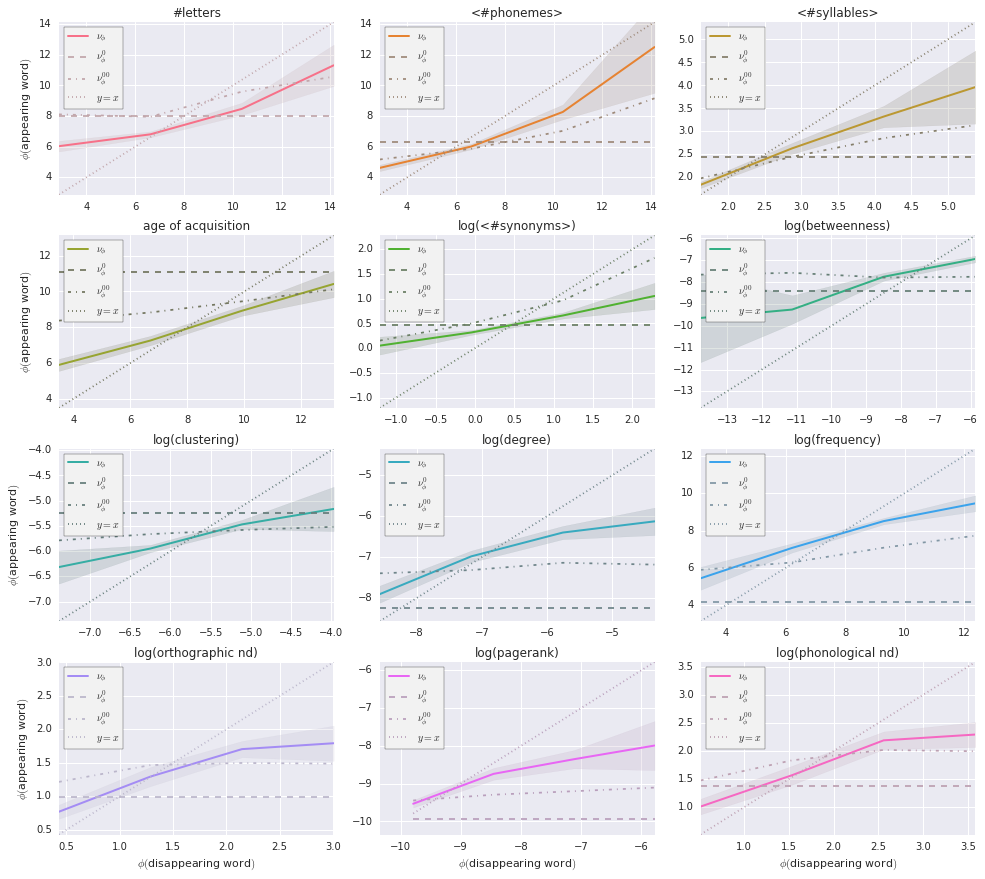

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

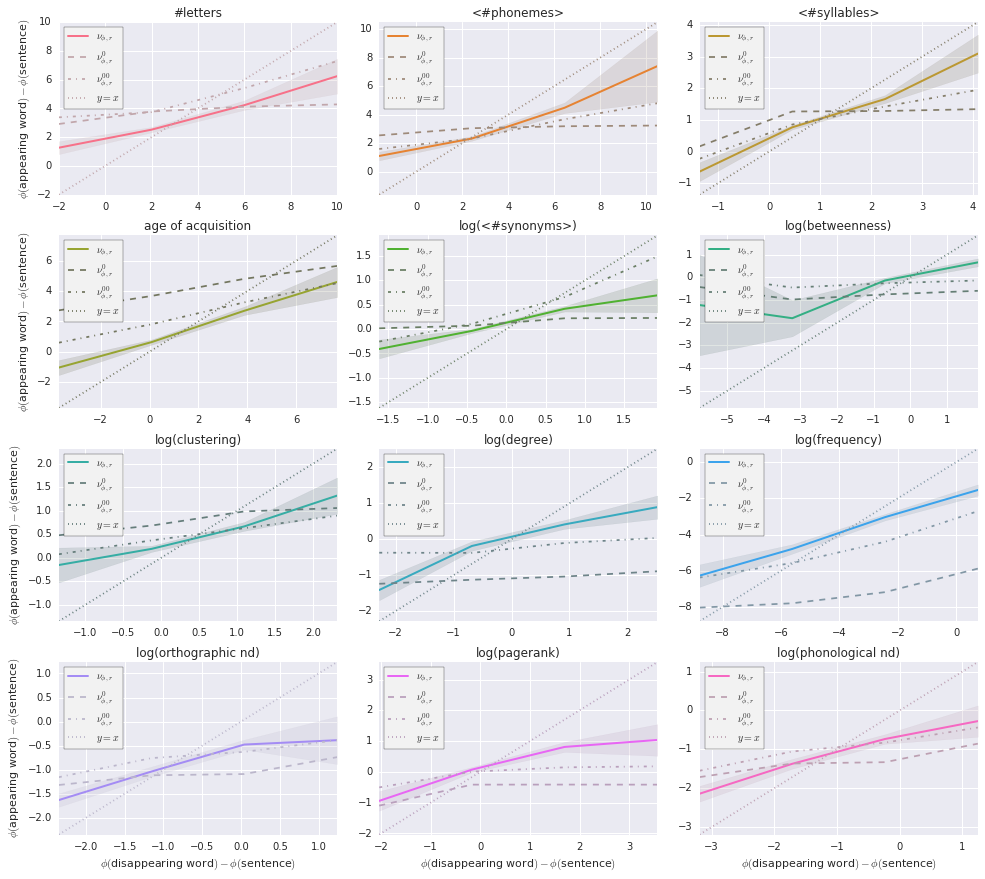

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

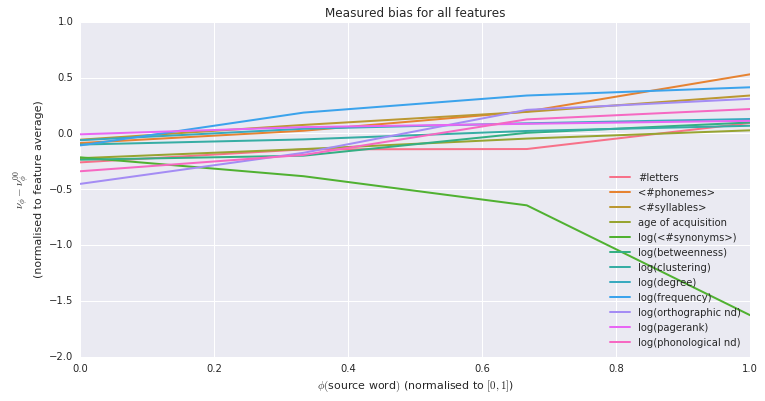

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

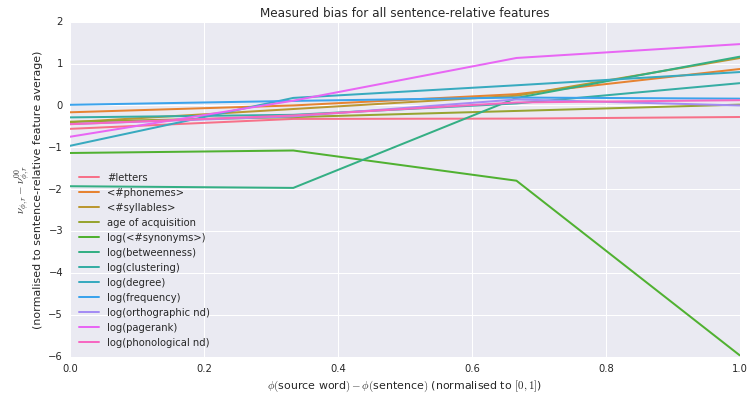

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

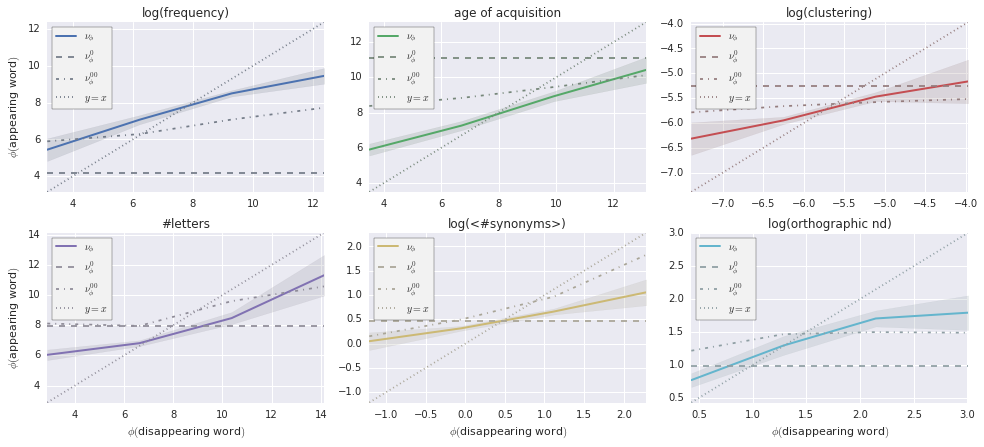

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

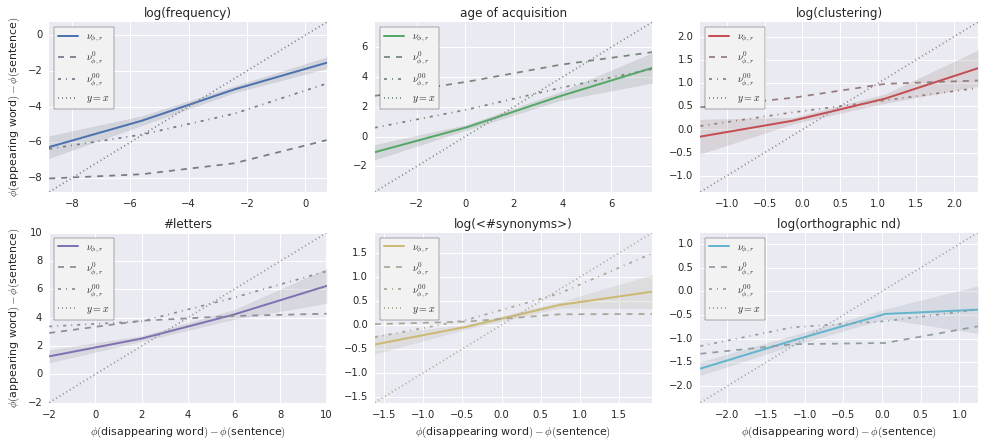

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

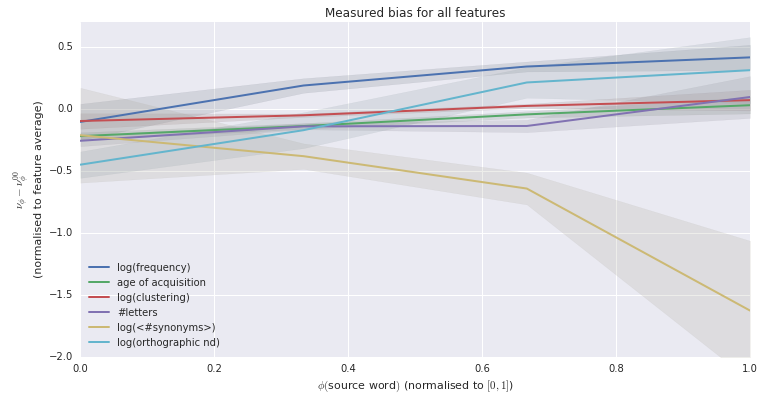

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

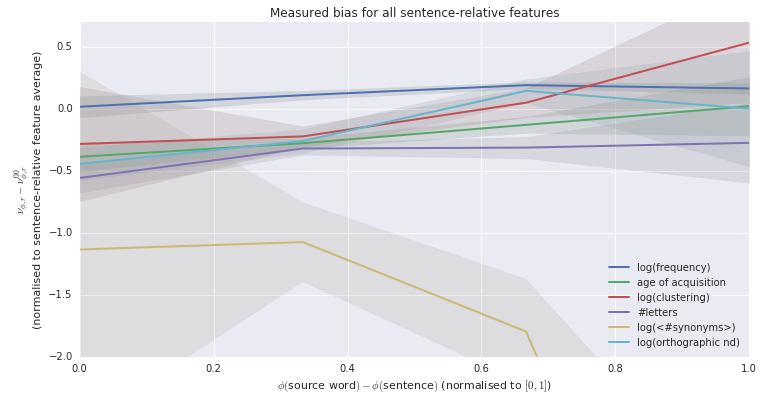

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


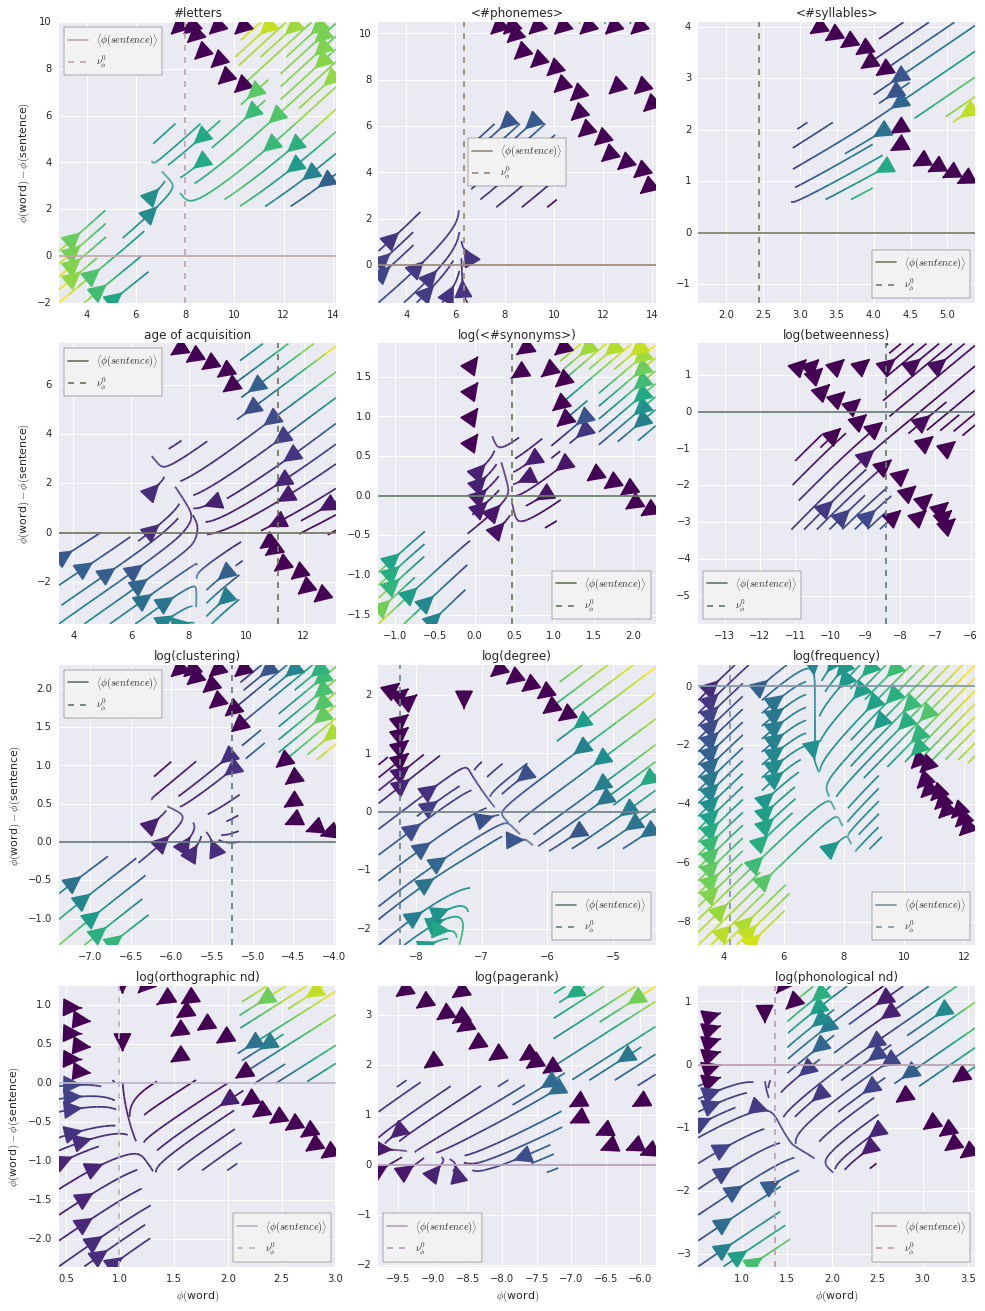

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


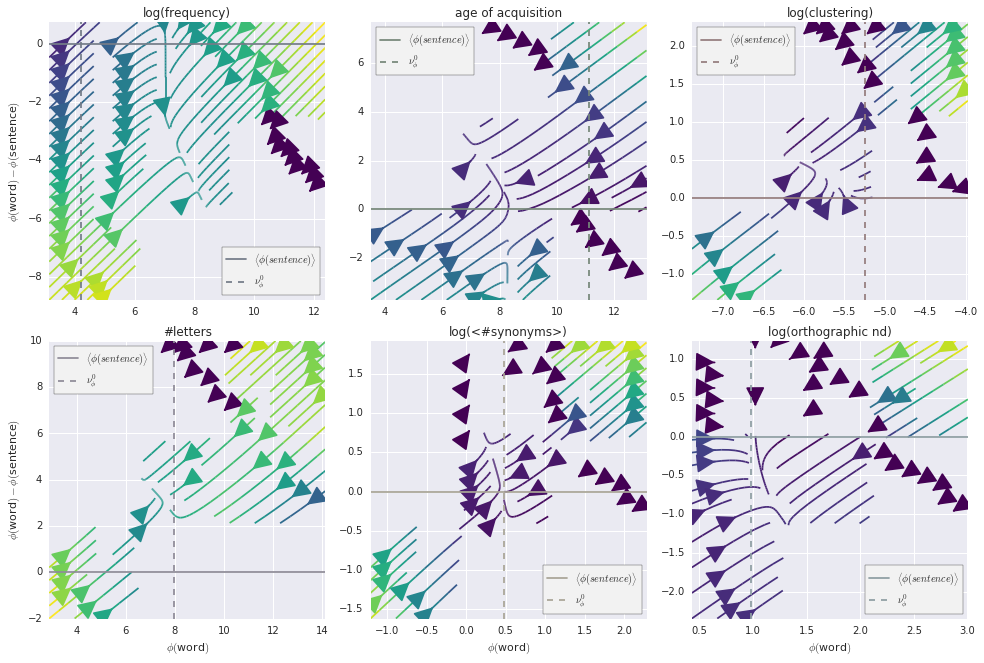

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.51993827  0.1792882   0.0806014   0.07756535  0.03286349  0.02972821
  0.02317456  0.01986912  0.01448923  0.01056936]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.517463,0.252126,-0.083100,0.225387,0.249889,-0.436114,0.188736,0.257118,-0.391824,0.276633,-0.162901,0.000182
Component-1,0.315661,-0.410827,0.132092,-0.292724,-0.248817,-0.439532,0.157139,-0.284313,-0.446798,0.207228,-0.156001,0.030166
Component-2,-0.641211,-0.633356,0.114390,-0.201278,0.236791,0.161871,-0.005920,-0.186611,0.075687,-0.068372,0.050134,0.063744


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 34285) |          | Elapsed Time: 0:00:41 ETA:  16 days, 10:15:05

  0% (  114 of 34285) |                    | Elapsed Time: 0:00:42 ETA:  0:04:22

  0% (  230 of 34285) |                    | Elapsed Time: 0:00:43 ETA:  0:04:16

  1% (  343 of 34285) |                    | Elapsed Time: 0:00:44 ETA:  0:04:17

  1% (  429 of 34285) |                    | Elapsed Time: 0:00:45 ETA:  0:04:17

  1% (  556 of 34285) |                    | Elapsed Time: 0:00:46 ETA:  0:04:08

  1% (  684 of 34285) |                    | Elapsed Time: 0:00:47 ETA:  0:04:03

  2% (  814 of 34285) |                    | Elapsed Time: 0:00:48 ETA:  0:03:58

  2% (  858 of 34285) |                    | Elapsed Time: 0:00:48 ETA:  0:03:56

  2% (  992 of 34285) |                    | Elapsed Time: 0:00:49 ETA:  0:03:51

  3% ( 1151 of 34285) |                    | Elapsed Time: 0:00:50 ETA:  0:03:38

  3% ( 1286 of 34285) |                    | Elapsed Time: 0:00:51 ETA:  0:03:28

  4% ( 1382 of 34285) |                    | Elapsed Time: 0:00:52 ETA:  0:03:31

  4% ( 1445 of 34285) |                    | Elapsed Time: 0:00:53 ETA:  0:03:44

  4% ( 1509 of 34285) |                    | Elapsed Time: 0:00:54 ETA:  0:04:02

  4% ( 1573 of 34285) |                    | Elapsed Time: 0:00:55 ETA:  0:04:23

  4% ( 1644 of 34285) |                    | Elapsed Time: 0:00:56 ETA:  0:04:44

  5% ( 1715 of 34285) |#                   | Elapsed Time: 0:00:57 ETA:  0:04:59

  5% ( 1851 of 34285) |#                   | Elapsed Time: 0:00:58 ETA:  0:04:57

  5% ( 1981 of 34285) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:09

  6% ( 2143 of 34285) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:02

  6% ( 2316 of 34285) |#                   | Elapsed Time: 0:01:01 ETA:  0:04:15

  7% ( 2487 of 34285) |#                   | Elapsed Time: 0:01:02 ETA:  0:03:39

  7% ( 2572 of 34285) |#                   | Elapsed Time: 0:01:02 ETA:  0:03:15

  7% ( 2739 of 34285) |#                   | Elapsed Time: 0:01:03 ETA:  0:02:52

  8% ( 2875 of 34285) |#                   | Elapsed Time: 0:01:04 ETA:  0:02:37

  8% ( 3000 of 34285) |#                   | Elapsed Time: 0:01:05 ETA:  0:02:36

  9% ( 3114 of 34285) |#                   | Elapsed Time: 0:01:06 ETA:  0:02:38

  9% ( 3260 of 34285) |#                   | Elapsed Time: 0:01:07 ETA:  0:02:40

  9% ( 3362 of 34285) |#                   | Elapsed Time: 0:01:08 ETA:  0:02:48

 10% ( 3429 of 34285) |##                  | Elapsed Time: 0:01:09 ETA:  0:02:56

 10% ( 3576 of 34285) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:00

 10% ( 3669 of 34285) |##                  | Elapsed Time: 0:01:11 ETA:  0:03:13

 11% ( 3785 of 34285) |##                  | Elapsed Time: 0:01:12 ETA:  0:03:25

 11% ( 3858 of 34285) |##                  | Elapsed Time: 0:01:12 ETA:  0:03:25

 11% ( 4001 of 34285) |##                  | Elapsed Time: 0:01:13 ETA:  0:03:22

 11% ( 4102 of 34285) |##                  | Elapsed Time: 0:01:14 ETA:  0:03:24

 12% ( 4202 of 34285) |##                  | Elapsed Time: 0:01:15 ETA:  0:03:37

 12% ( 4286 of 34285) |##                  | Elapsed Time: 0:01:16 ETA:  0:03:34

 12% ( 4388 of 34285) |##                  | Elapsed Time: 0:01:17 ETA:  0:03:39

 13% ( 4483 of 34285) |##                  | Elapsed Time: 0:01:18 ETA:  0:03:55

 13% ( 4591 of 34285) |##                  | Elapsed Time: 0:01:19 ETA:  0:03:49

 13% ( 4715 of 34285) |##                  | Elapsed Time: 0:01:20 ETA:  0:03:59

 14% ( 4816 of 34285) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:15

 14% ( 4918 of 34285) |##                  | Elapsed Time: 0:01:23 ETA:  0:04:13

 14% ( 5019 of 34285) |##                  | Elapsed Time: 0:01:24 ETA:  0:04:12

 14% ( 5120 of 34285) |##                  | Elapsed Time: 0:01:25 ETA:  0:04:13

 15% ( 5143 of 34285) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:13

 15% ( 5246 of 34285) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:09

 15% ( 5347 of 34285) |###                 | Elapsed Time: 0:01:27 ETA:  0:04:11

 15% ( 5449 of 34285) |###                 | Elapsed Time: 0:01:28 ETA:  0:04:11

 16% ( 5551 of 34285) |###                 | Elapsed Time: 0:01:29 ETA:  0:04:10

 16% ( 5572 of 34285) |###                 | Elapsed Time: 0:01:29 ETA:  0:04:09

 16% ( 5675 of 34285) |###                 | Elapsed Time: 0:01:30 ETA:  0:04:07

 16% ( 5777 of 34285) |###                 | Elapsed Time: 0:01:31 ETA:  0:04:06

 17% ( 5887 of 34285) |###                 | Elapsed Time: 0:01:32 ETA:  0:04:01

 17% ( 6000 of 34285) |###                 | Elapsed Time: 0:01:33 ETA:  0:03:51

 17% ( 6133 of 34285) |###                 | Elapsed Time: 0:01:34 ETA:  0:03:40

 18% ( 6243 of 34285) |###                 | Elapsed Time: 0:01:35 ETA:  0:03:36

 18% ( 6347 of 34285) |###                 | Elapsed Time: 0:01:36 ETA:  0:03:33

 18% ( 6429 of 34285) |###                 | Elapsed Time: 0:01:37 ETA:  0:03:29

 19% ( 6533 of 34285) |###                 | Elapsed Time: 0:01:38 ETA:  0:03:30

 19% ( 6638 of 34285) |###                 | Elapsed Time: 0:01:39 ETA:  0:03:28

 19% ( 6750 of 34285) |###                 | Elapsed Time: 0:01:40 ETA:  0:03:24

 20% ( 6857 of 34285) |####                | Elapsed Time: 0:01:41 ETA:  0:03:21

 20% ( 6964 of 34285) |####                | Elapsed Time: 0:01:42 ETA:  0:03:26

 20% ( 7069 of 34285) |####                | Elapsed Time: 0:01:43 ETA:  0:03:34

 20% ( 7191 of 34285) |####                | Elapsed Time: 0:01:44 ETA:  0:03:29

 21% ( 7286 of 34285) |####                | Elapsed Time: 0:01:44 ETA:  0:03:24

 21% ( 7401 of 34285) |####                | Elapsed Time: 0:01:45 ETA:  0:03:22

 21% ( 7523 of 34285) |####                | Elapsed Time: 0:01:46 ETA:  0:03:15

 22% ( 7649 of 34285) |####                | Elapsed Time: 0:01:47 ETA:  0:03:08

 22% ( 7715 of 34285) |####                | Elapsed Time: 0:01:48 ETA:  0:03:06

 22% ( 7835 of 34285) |####                | Elapsed Time: 0:01:49 ETA:  0:03:03

 23% ( 7965 of 34285) |####                | Elapsed Time: 0:01:50 ETA:  0:02:55

 23% ( 8086 of 34285) |####                | Elapsed Time: 0:01:51 ETA:  0:02:50

 23% ( 8143 of 34285) |####                | Elapsed Time: 0:01:51 ETA:  0:02:50

 24% ( 8244 of 34285) |####                | Elapsed Time: 0:01:52 ETA:  0:02:56

 24% ( 8339 of 34285) |####                | Elapsed Time: 0:01:53 ETA:  0:03:01

 24% ( 8460 of 34285) |####                | Elapsed Time: 0:01:54 ETA:  0:03:00

 25% ( 8572 of 34285) |#####               | Elapsed Time: 0:01:55 ETA:  0:03:05

 25% ( 8726 of 34285) |#####               | Elapsed Time: 0:01:56 ETA:  0:02:53

 25% ( 8874 of 34285) |#####               | Elapsed Time: 0:01:57 ETA:  0:02:46

 26% ( 9000 of 34285) |#####               | Elapsed Time: 0:01:58 ETA:  0:02:38

 26% ( 9167 of 34285) |#####               | Elapsed Time: 0:01:59 ETA:  0:02:24

 27% ( 9280 of 34285) |#####               | Elapsed Time: 0:02:00 ETA:  0:02:20

 27% ( 9373 of 34285) |#####               | Elapsed Time: 0:02:01 ETA:  0:02:19

 27% ( 9429 of 34285) |#####               | Elapsed Time: 0:02:02 ETA:  0:02:22

 27% ( 9522 of 34285) |#####               | Elapsed Time: 0:02:03 ETA:  0:02:26

 28% ( 9655 of 34285) |#####               | Elapsed Time: 0:02:04 ETA:  0:02:24

 28% ( 9800 of 34285) |#####               | Elapsed Time: 0:02:05 ETA:  0:02:25

 28% ( 9857 of 34285) |#####               | Elapsed Time: 0:02:05 ETA:  0:02:29

 29% ( 9998 of 34285) |#####               | Elapsed Time: 0:02:06 ETA:  0:02:29

 29% (10132 of 34285) |#####               | Elapsed Time: 0:02:07 ETA:  0:02:37

 29% (10238 of 34285) |#####               | Elapsed Time: 0:02:08 ETA:  0:02:38

 30% (10286 of 34285) |######              | Elapsed Time: 0:02:09 ETA:  0:02:32

 30% (10439 of 34285) |######              | Elapsed Time: 0:02:10 ETA:  0:02:17

 30% (10569 of 34285) |######              | Elapsed Time: 0:02:11 ETA:  0:02:07

 31% (10715 of 34285) |######              | Elapsed Time: 0:02:12 ETA:  0:02:09

 31% (10861 of 34285) |######              | Elapsed Time: 0:02:13 ETA:  0:02:05

 32% (10996 of 34285) |######              | Elapsed Time: 0:02:14 ETA:  0:02:06

 32% (11143 of 34285) |######              | Elapsed Time: 0:02:15 ETA:  0:01:58

 32% (11312 of 34285) |######              | Elapsed Time: 0:02:16 ETA:  0:01:42

 33% (11481 of 34285) |######              | Elapsed Time: 0:02:17 ETA:  0:01:32

 33% (11572 of 34285) |######              | Elapsed Time: 0:02:17 ETA:  0:01:30

 34% (11732 of 34285) |######              | Elapsed Time: 0:02:18 ETA:  0:01:24

 34% (11852 of 34285) |######              | Elapsed Time: 0:02:19 ETA:  0:01:25

 35% (12000 of 34285) |#######             | Elapsed Time: 0:02:21 ETA:  0:01:28

 35% (12150 of 34285) |#######             | Elapsed Time: 0:02:22 ETA:  0:01:24

 35% (12322 of 34285) |#######             | Elapsed Time: 0:02:23 ETA:  0:01:22

 36% (12429 of 34285) |#######             | Elapsed Time: 0:02:23 ETA:  0:01:22

 36% (12586 of 34285) |#######             | Elapsed Time: 0:02:24 ETA:  0:01:23

 36% (12684 of 34285) |#######             | Elapsed Time: 0:02:25 ETA:  0:01:35

 37% (12783 of 34285) |#######             | Elapsed Time: 0:02:26 ETA:  0:01:48

 37% (12857 of 34285) |#######             | Elapsed Time: 0:02:27 ETA:  0:01:51

 37% (12955 of 34285) |#######             | Elapsed Time: 0:02:28 ETA:  0:01:57

 38% (13074 of 34285) |#######             | Elapsed Time: 0:02:29 ETA:  0:01:59

 38% (13211 of 34285) |#######             | Elapsed Time: 0:02:30 ETA:  0:02:02

 38% (13286 of 34285) |#######             | Elapsed Time: 0:02:31 ETA:  0:02:13

 39% (13385 of 34285) |#######             | Elapsed Time: 0:02:32 ETA:  0:02:27

 39% (13538 of 34285) |#######             | Elapsed Time: 0:02:33 ETA:  0:02:27

 39% (13682 of 34285) |#######             | Elapsed Time: 0:02:34 ETA:  0:02:12

 40% (13714 of 34285) |########            | Elapsed Time: 0:02:34 ETA:  0:02:08

 40% (13771 of 34285) |########            | Elapsed Time: 0:02:35 ETA:  0:02:21

 40% (13900 of 34285) |########            | Elapsed Time: 0:02:36 ETA:  0:02:10

 40% (14010 of 34285) |########            | Elapsed Time: 0:02:37 ETA:  0:02:12

 41% (14143 of 34285) |########            | Elapsed Time: 0:02:38 ETA:  0:02:20

 41% (14262 of 34285) |########            | Elapsed Time: 0:02:39 ETA:  0:02:12

 42% (14418 of 34285) |########            | Elapsed Time: 0:02:40 ETA:  0:02:10

 42% (14541 of 34285) |########            | Elapsed Time: 0:02:41 ETA:  0:02:17

 42% (14572 of 34285) |########            | Elapsed Time: 0:02:41 ETA:  0:02:14

 42% (14685 of 34285) |########            | Elapsed Time: 0:02:42 ETA:  0:01:55

 43% (14797 of 34285) |########            | Elapsed Time: 0:02:43 ETA:  0:02:00

 43% (14918 of 34285) |########            | Elapsed Time: 0:02:44 ETA:  0:01:55

 43% (15000 of 34285) |########            | Elapsed Time: 0:02:45 ETA:  0:01:50

 44% (15148 of 34285) |########            | Elapsed Time: 0:02:46 ETA:  0:01:45

 44% (15280 of 34285) |########            | Elapsed Time: 0:02:47 ETA:  0:01:40

 44% (15378 of 34285) |########            | Elapsed Time: 0:02:48 ETA:  0:01:56

 45% (15429 of 34285) |#########           | Elapsed Time: 0:02:48 ETA:  0:01:57

 45% (15582 of 34285) |#########           | Elapsed Time: 0:02:49 ETA:  0:01:46

 45% (15733 of 34285) |#########           | Elapsed Time: 0:02:50 ETA:  0:01:34

 46% (15857 of 34285) |#########           | Elapsed Time: 0:02:51 ETA:  0:01:29

 46% (15984 of 34285) |#########           | Elapsed Time: 0:02:52 ETA:  0:01:27

 47% (16130 of 34285) |#########           | Elapsed Time: 0:02:53 ETA:  0:01:22

 47% (16255 of 34285) |#########           | Elapsed Time: 0:02:54 ETA:  0:01:26

 47% (16286 of 34285) |#########           | Elapsed Time: 0:02:55 ETA:  0:01:27

 47% (16422 of 34285) |#########           | Elapsed Time: 0:02:56 ETA:  0:01:16

 48% (16561 of 34285) |#########           | Elapsed Time: 0:02:57 ETA:  0:01:12

 48% (16714 of 34285) |#########           | Elapsed Time: 0:02:58 ETA:  0:01:18

 49% (16865 of 34285) |#########           | Elapsed Time: 0:02:59 ETA:  0:01:12

 49% (16967 of 34285) |#########           | Elapsed Time: 0:03:00 ETA:  0:01:17

 49% (17089 of 34285) |#########           | Elapsed Time: 0:03:01 ETA:  0:01:22

 50% (17143 of 34285) |##########          | Elapsed Time: 0:03:01 ETA:  0:01:19

 50% (17269 of 34285) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:19

 50% (17396 of 34285) |##########          | Elapsed Time: 0:03:03 ETA:  0:01:20

 51% (17517 of 34285) |##########          | Elapsed Time: 0:03:04 ETA:  0:01:24

 51% (17572 of 34285) |##########          | Elapsed Time: 0:03:05 ETA:  0:01:28

 51% (17705 of 34285) |##########          | Elapsed Time: 0:03:06 ETA:  0:01:25

 51% (17824 of 34285) |##########          | Elapsed Time: 0:03:07 ETA:  0:01:33

 52% (17964 of 34285) |##########          | Elapsed Time: 0:03:08 ETA:  0:01:22

 52% (18000 of 34285) |##########          | Elapsed Time: 0:03:08 ETA:  0:01:24

 52% (18122 of 34285) |##########          | Elapsed Time: 0:03:09 ETA:  0:01:27

 53% (18249 of 34285) |##########          | Elapsed Time: 0:03:10 ETA:  0:01:25

 53% (18387 of 34285) |##########          | Elapsed Time: 0:03:11 ETA:  0:01:21

 53% (18429 of 34285) |##########          | Elapsed Time: 0:03:11 ETA:  0:01:19

 54% (18588 of 34285) |##########          | Elapsed Time: 0:03:12 ETA:  0:01:08

 54% (18708 of 34285) |##########          | Elapsed Time: 0:03:13 ETA:  0:01:11

 54% (18828 of 34285) |##########          | Elapsed Time: 0:03:14 ETA:  0:01:09

 55% (18857 of 34285) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:13

 55% (18977 of 34285) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:10

 55% (19129 of 34285) |###########         | Elapsed Time: 0:03:17 ETA:  0:01:01

 56% (19286 of 34285) |###########         | Elapsed Time: 0:03:18 ETA:  0:00:56

 56% (19417 of 34285) |###########         | Elapsed Time: 0:03:19 ETA:  0:00:56

 56% (19529 of 34285) |###########         | Elapsed Time: 0:03:20 ETA:  0:01:07

 57% (19630 of 34285) |###########         | Elapsed Time: 0:03:21 ETA:  0:01:12

 57% (19714 of 34285) |###########         | Elapsed Time: 0:03:21 ETA:  0:01:06

 57% (19863 of 34285) |###########         | Elapsed Time: 0:03:22 ETA:  0:00:59

 58% (20021 of 34285) |###########         | Elapsed Time: 0:03:23 ETA:  0:00:49

 58% (20143 of 34285) |###########         | Elapsed Time: 0:03:24 ETA:  0:00:47

 59% (20286 of 34285) |###########         | Elapsed Time: 0:03:25 ETA:  0:00:46

 59% (20351 of 34285) |###########         | Elapsed Time: 0:03:26 ETA:  0:01:03

 59% (20449 of 34285) |###########         | Elapsed Time: 0:03:27 ETA:  0:01:10

 60% (20571 of 34285) |############        | Elapsed Time: 0:03:28 ETA:  0:01:06

 60% (20694 of 34285) |############        | Elapsed Time: 0:03:29 ETA:  0:00:59

 60% (20855 of 34285) |############        | Elapsed Time: 0:03:30 ETA:  0:00:53

 61% (21000 of 34285) |############        | Elapsed Time: 0:03:31 ETA:  0:01:01

 61% (21144 of 34285) |############        | Elapsed Time: 0:03:32 ETA:  0:01:02

 62% (21280 of 34285) |############        | Elapsed Time: 0:03:33 ETA:  0:01:03

 62% (21429 of 34285) |############        | Elapsed Time: 0:03:34 ETA:  0:00:33

 62% (21557 of 34285) |############        | Elapsed Time: 0:03:35 ETA:  0:00:32

 63% (21694 of 34285) |############        | Elapsed Time: 0:03:36 ETA:  0:00:27

 63% (21857 of 34285) |############        | Elapsed Time: 0:03:37 ETA:  0:00:32

 64% (22013 of 34285) |############        | Elapsed Time: 0:03:38 ETA:  0:00:26

 64% (22147 of 34285) |############        | Elapsed Time: 0:03:39 ETA:  0:00:28

 65% (22286 of 34285) |#############       | Elapsed Time: 0:03:41 ETA:  0:00:29

 65% (22408 of 34285) |#############       | Elapsed Time: 0:03:42 ETA:  0:00:32

 65% (22534 of 34285) |#############       | Elapsed Time: 0:03:43 ETA:  0:00:31

 66% (22629 of 34285) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:42

 66% (22714 of 34285) |#############       | Elapsed Time: 0:03:44 ETA:  0:00:43

 66% (22851 of 34285) |#############       | Elapsed Time: 0:03:45 ETA:  0:00:37

 67% (22982 of 34285) |#############       | Elapsed Time: 0:03:46 ETA:  0:00:43

 67% (23084 of 34285) |#############       | Elapsed Time: 0:03:51 ETA:  0:03:17

 67% (23143 of 34285) |#############       | Elapsed Time: 0:03:51 ETA:  0:03:24

 67% (23292 of 34285) |#############       | Elapsed Time: 0:03:53 ETA:  0:02:54

 68% (23425 of 34285) |#############       | Elapsed Time: 0:03:54 ETA:  0:02:49

 68% (23571 of 34285) |#############       | Elapsed Time: 0:03:55 ETA:  0:02:45

 69% (23705 of 34285) |#############       | Elapsed Time: 0:03:56 ETA:  0:02:41

 69% (23853 of 34285) |#############       | Elapsed Time: 0:03:57 ETA:  0:02:36

 69% (23970 of 34285) |#############       | Elapsed Time: 0:03:58 ETA:  0:02:41

 70% (24000 of 34285) |##############      | Elapsed Time: 0:03:58 ETA:  0:00:11

 70% (24091 of 34285) |##############      | Elapsed Time: 0:03:59 ETA:  0:00:26

 70% (24207 of 34285) |##############      | Elapsed Time: 0:04:00 ETA:  0:00:35

 70% (24308 of 34285) |##############      | Elapsed Time: 0:04:01 ETA:  0:00:44

 71% (24429 of 34285) |##############      | Elapsed Time: 0:04:02 ETA:  0:00:49

 71% (24532 of 34285) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:51

 71% (24624 of 34285) |##############      | Elapsed Time: 0:04:04 ETA:  0:01:04

 72% (24754 of 34285) |##############      | Elapsed Time: 0:04:05 ETA:  0:01:09

 72% (24857 of 34285) |##############      | Elapsed Time: 0:04:06 ETA:  0:01:02

 72% (24962 of 34285) |##############      | Elapsed Time: 0:04:07 ETA:  0:01:03

 73% (25080 of 34285) |##############      | Elapsed Time: 0:04:08 ETA:  0:00:54

 73% (25209 of 34285) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:49

 73% (25286 of 34285) |##############      | Elapsed Time: 0:04:09 ETA:  0:00:42

 74% (25441 of 34285) |##############      | Elapsed Time: 0:04:10 ETA:  0:00:33

 74% (25551 of 34285) |##############      | Elapsed Time: 0:04:11 ETA:  0:00:30

 74% (25672 of 34285) |##############      | Elapsed Time: 0:04:12 ETA:  0:00:21

 75% (25714 of 34285) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:25

 75% (25870 of 34285) |###############     | Elapsed Time: 0:04:14 ETA:  0:00:19

 75% (25968 of 34285) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:20

 76% (26143 of 34285) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:07

 76% (26300 of 34285) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:00

 77% (26429 of 34285) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:04

 77% (26571 of 34285) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:00

 77% (26681 of 34285) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:00

 78% (26819 of 34285) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:03

 78% (26930 of 34285) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:00

 78% (27000 of 34285) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:05

 79% (27151 of 34285) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:00

 79% (27273 of 34285) |###############     | Elapsed Time: 0:04:25 ETA:  0:00:08

 79% (27388 of 34285) |###############     | Elapsed Time: 0:04:26 ETA:  0:00:11

 80% (27428 of 34285) |################    | Elapsed Time: 0:04:26 ETA:  0:00:13

 80% (27550 of 34285) |################    | Elapsed Time: 0:04:27 ETA:  0:00:12

 80% (27679 of 34285) |################    | Elapsed Time: 0:04:28 ETA:  0:00:06

 81% (27820 of 34285) |################    | Elapsed Time: 0:04:29 ETA:  0:00:04

 81% (27857 of 34285) |################    | Elapsed Time: 0:04:29 ETA:  0:00:01

 81% (28024 of 34285) |################    | Elapsed Time: 0:04:30 ETA:  0:00:00

 82% (28146 of 34285) |################    | Elapsed Time: 0:04:31 ETA:  0:00:00

 82% (28225 of 34285) |################    | Elapsed Time: 0:04:32 ETA:  0:00:07

 82% (28286 of 34285) |################    | Elapsed Time: 0:04:33 ETA:  0:00:00

 82% (28401 of 34285) |################    | Elapsed Time: 0:04:34 ETA:  0:00:00

 83% (28504 of 34285) |################    | Elapsed Time: 0:04:35 ETA:  0:00:02

 83% (28627 of 34285) |################    | Elapsed Time: 0:04:36 ETA:  0:00:03

 83% (28714 of 34285) |################    | Elapsed Time: 0:04:36 ETA:  0:00:04

 84% (28848 of 34285) |################    | Elapsed Time: 0:04:37 ETA:  0:00:00

 84% (28992 of 34285) |################    | Elapsed Time: 0:04:38 ETA:  0:00:04

 85% (29143 of 34285) |#################   | Elapsed Time: 0:04:39 ETA:  0:00:00

 85% (29283 of 34285) |#################   | Elapsed Time: 0:04:40 ETA:  0:00:00

 85% (29415 of 34285) |#################   | Elapsed Time: 0:04:41 ETA:  0:00:00

 86% (29571 of 34285) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:00

 86% (29708 of 34285) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:00

 87% (29844 of 34285) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:00

 87% (30000 of 34285) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:00

 87% (30146 of 34285) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:00

 88% (30308 of 34285) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:00

 88% (30428 of 34285) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:00

 89% (30574 of 34285) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:00

 89% (30706 of 34285) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:00

 89% (30815 of 34285) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:00

 90% (30857 of 34285) |##################  | Elapsed Time: 0:04:52 ETA:  0:00:00

 90% (30979 of 34285) |##################  | Elapsed Time: 0:04:53 ETA:  0:00:00

 90% (31097 of 34285) |##################  | Elapsed Time: 0:04:54 ETA:  0:00:00

 91% (31242 of 34285) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 91% (31286 of 34285) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 91% (31424 of 34285) |##################  | Elapsed Time: 0:04:56 ETA:  0:00:00

 91% (31538 of 34285) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:00

 92% (31674 of 34285) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 92% (31714 of 34285) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 92% (31857 of 34285) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 93% (32014 of 34285) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 93% (32143 of 34285) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 94% (32269 of 34285) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 94% (32401 of 34285) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:00

 95% (32571 of 34285) |################### | Elapsed Time: 0:05:04 ETA:  0:00:00

 95% (32723 of 34285) |################### | Elapsed Time: 0:05:05 ETA:  0:00:00

 95% (32862 of 34285) |################### | Elapsed Time: 0:05:06 ETA:  0:00:00

 96% (33000 of 34285) |################### | Elapsed Time: 0:05:07 ETA:  0:00:00

 96% (33155 of 34285) |################### | Elapsed Time: 0:05:08 ETA:  0:00:00

 97% (33310 of 34285) |################### | Elapsed Time: 0:05:09 ETA:  0:00:00

 97% (33428 of 34285) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 97% (33573 of 34285) |################### | Elapsed Time: 0:05:11 ETA:  0:00:00

 98% (33720 of 34285) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 98% (33857 of 34285) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 99% (33986 of 34285) |################### | Elapsed Time: 0:05:14 ETA:  0:00:00

 99% (34117 of 34285) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

100% (34285 of 34285) |####################| Elapsed Time: 0:05:16 Time: 0:05:16


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

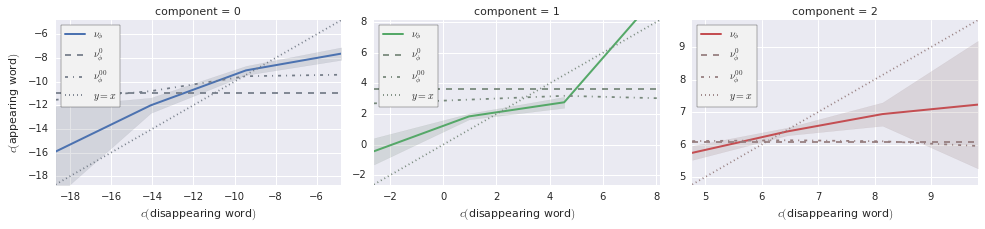

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.57479805  0.18275611  0.14197108  0.03936292  0.03580234]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.722044,-0.080992,0.324413,-0.555291,0.241860,-0.001932
Component-1,0.429392,0.112285,-0.452777,-0.736321,0.236298,0.001403
Component-2,-0.535046,0.061889,-0.820160,0.185814,-0.049754,0.015193


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 34285) |            | Elapsed Time: 0:00:13 ETA:  5 days, 5:53:02

  0% (  124 of 34285) |                    | Elapsed Time: 0:00:14 ETA:  0:04:24

  0% (  254 of 34285) |                    | Elapsed Time: 0:00:15 ETA:  0:04:16

  1% (  384 of 34285) |                    | Elapsed Time: 0:00:16 ETA:  0:04:13

  1% (  429 of 34285) |                    | Elapsed Time: 0:00:16 ETA:  0:04:12

  1% (  567 of 34285) |                    | Elapsed Time: 0:00:17 ETA:  0:04:07

  2% (  704 of 34285) |                    | Elapsed Time: 0:00:18 ETA:  0:04:03

  2% (  858 of 34285) |                    | Elapsed Time: 0:00:19 ETA:  0:03:59

  2% (  995 of 34285) |                    | Elapsed Time: 0:00:20 ETA:  0:03:57

  3% ( 1149 of 34285) |                    | Elapsed Time: 0:00:21 ETA:  0:03:48

  3% ( 1286 of 34285) |                    | Elapsed Time: 0:00:22 ETA:  0:03:41

  4% ( 1390 of 34285) |                    | Elapsed Time: 0:00:23 ETA:  0:03:47

  4% ( 1462 of 34285) |                    | Elapsed Time: 0:00:24 ETA:  0:04:01

  4% ( 1535 of 34285) |                    | Elapsed Time: 0:00:25 ETA:  0:04:17

  4% ( 1612 of 34285) |                    | Elapsed Time: 0:00:26 ETA:  0:04:35

  4% ( 1689 of 34285) |                    | Elapsed Time: 0:00:27 ETA:  0:04:56

  5% ( 1715 of 34285) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:59

  5% ( 1857 of 34285) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:56

  5% ( 1993 of 34285) |#                   | Elapsed Time: 0:00:29 ETA:  0:05:02

  6% ( 2143 of 34285) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:57

  6% ( 2318 of 34285) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:31

  7% ( 2497 of 34285) |#                   | Elapsed Time: 0:00:32 ETA:  0:03:58

  7% ( 2572 of 34285) |#                   | Elapsed Time: 0:00:33 ETA:  0:03:38

  8% ( 2748 of 34285) |#                   | Elapsed Time: 0:00:34 ETA:  0:03:15

  8% ( 2895 of 34285) |#                   | Elapsed Time: 0:00:35 ETA:  0:03:01

  8% ( 3000 of 34285) |#                   | Elapsed Time: 0:00:35 ETA:  0:02:58

  9% ( 3132 of 34285) |#                   | Elapsed Time: 0:00:36 ETA:  0:02:59

  9% ( 3288 of 34285) |#                   | Elapsed Time: 0:00:37 ETA:  0:02:54

 10% ( 3429 of 34285) |##                  | Elapsed Time: 0:00:39 ETA:  0:03:06

 10% ( 3583 of 34285) |##                  | Elapsed Time: 0:00:40 ETA:  0:03:10

 10% ( 3686 of 34285) |##                  | Elapsed Time: 0:00:41 ETA:  0:03:22

 11% ( 3820 of 34285) |##                  | Elapsed Time: 0:00:42 ETA:  0:03:30

 11% ( 3858 of 34285) |##                  | Elapsed Time: 0:00:42 ETA:  0:03:32

 11% ( 4006 of 34285) |##                  | Elapsed Time: 0:00:43 ETA:  0:03:30

 12% ( 4124 of 34285) |##                  | Elapsed Time: 0:00:44 ETA:  0:03:33

 12% ( 4243 of 34285) |##                  | Elapsed Time: 0:00:45 ETA:  0:03:42

 12% ( 4286 of 34285) |##                  | Elapsed Time: 0:00:45 ETA:  0:03:36

 12% ( 4403 of 34285) |##                  | Elapsed Time: 0:00:46 ETA:  0:03:42

 13% ( 4521 of 34285) |##                  | Elapsed Time: 0:00:47 ETA:  0:03:51

 13% ( 4642 of 34285) |##                  | Elapsed Time: 0:00:48 ETA:  0:03:45

 13% ( 4715 of 34285) |##                  | Elapsed Time: 0:00:49 ETA:  0:03:48

 14% ( 4834 of 34285) |##                  | Elapsed Time: 0:00:50 ETA:  0:03:51

 14% ( 4952 of 34285) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:58

 14% ( 5071 of 34285) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:57

 15% ( 5143 of 34285) |###                 | Elapsed Time: 0:00:53 ETA:  0:03:57

 15% ( 5263 of 34285) |###                 | Elapsed Time: 0:00:54 ETA:  0:03:55

 15% ( 5380 of 34285) |###                 | Elapsed Time: 0:00:55 ETA:  0:03:54

 16% ( 5493 of 34285) |###                 | Elapsed Time: 0:00:56 ETA:  0:03:55

 16% ( 5572 of 34285) |###                 | Elapsed Time: 0:00:56 ETA:  0:03:55

 16% ( 5691 of 34285) |###                 | Elapsed Time: 0:00:57 ETA:  0:03:55

 16% ( 5810 of 34285) |###                 | Elapsed Time: 0:00:58 ETA:  0:03:53

 17% ( 5947 of 34285) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:47

 17% ( 6000 of 34285) |###                 | Elapsed Time: 0:01:00 ETA:  0:03:44

 17% ( 6150 of 34285) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:34

 18% ( 6271 of 34285) |###                 | Elapsed Time: 0:01:02 ETA:  0:03:32

 18% ( 6393 of 34285) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:30

 18% ( 6429 of 34285) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:26

 19% ( 6549 of 34285) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:25

 19% ( 6668 of 34285) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:24

 19% ( 6795 of 34285) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:21

 20% ( 6857 of 34285) |####                | Elapsed Time: 0:01:06 ETA:  0:03:23

 20% ( 6976 of 34285) |####                | Elapsed Time: 0:01:07 ETA:  0:03:26

 20% ( 7095 of 34285) |####                | Elapsed Time: 0:01:08 ETA:  0:03:34

 21% ( 7225 of 34285) |####                | Elapsed Time: 0:01:09 ETA:  0:03:30

 21% ( 7286 of 34285) |####                | Elapsed Time: 0:01:10 ETA:  0:03:29

 21% ( 7416 of 34285) |####                | Elapsed Time: 0:01:11 ETA:  0:03:26

 22% ( 7549 of 34285) |####                | Elapsed Time: 0:01:12 ETA:  0:03:21

 22% ( 7685 of 34285) |####                | Elapsed Time: 0:01:13 ETA:  0:03:16

 22% ( 7715 of 34285) |####                | Elapsed Time: 0:01:13 ETA:  0:03:15

 22% ( 7846 of 34285) |####                | Elapsed Time: 0:01:14 ETA:  0:03:13

 23% ( 7986 of 34285) |####                | Elapsed Time: 0:01:15 ETA:  0:03:07

 23% ( 8113 of 34285) |####                | Elapsed Time: 0:01:16 ETA:  0:03:03

 23% ( 8143 of 34285) |####                | Elapsed Time: 0:01:16 ETA:  0:03:03

 24% ( 8255 of 34285) |####                | Elapsed Time: 0:01:17 ETA:  0:03:07

 24% ( 8364 of 34285) |####                | Elapsed Time: 0:01:18 ETA:  0:03:12

 24% ( 8496 of 34285) |####                | Elapsed Time: 0:01:19 ETA:  0:03:11

 25% ( 8572 of 34285) |#####               | Elapsed Time: 0:01:20 ETA:  0:03:14

 25% ( 8732 of 34285) |#####               | Elapsed Time: 0:01:21 ETA:  0:03:04

 25% ( 8886 of 34285) |#####               | Elapsed Time: 0:01:22 ETA:  0:02:57

 26% ( 9000 of 34285) |#####               | Elapsed Time: 0:01:23 ETA:  0:02:55

 26% ( 9174 of 34285) |#####               | Elapsed Time: 0:01:24 ETA:  0:02:43

 27% ( 9292 of 34285) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:45

 27% ( 9394 of 34285) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:46

 27% ( 9429 of 34285) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:43

 27% ( 9531 of 34285) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:49

 28% ( 9682 of 34285) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:42

 28% ( 9857 of 34285) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:45

 29% (10011 of 34285) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:43

 29% (10155 of 34285) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:50

 30% (10286 of 34285) |######              | Elapsed Time: 0:01:32 ETA:  0:02:42

 30% (10448 of 34285) |######              | Elapsed Time: 0:01:33 ETA:  0:02:31

 30% (10587 of 34285) |######              | Elapsed Time: 0:01:34 ETA:  0:02:22

 31% (10715 of 34285) |######              | Elapsed Time: 0:01:35 ETA:  0:02:21

 31% (10870 of 34285) |######              | Elapsed Time: 0:01:36 ETA:  0:02:21

 32% (11022 of 34285) |######              | Elapsed Time: 0:01:37 ETA:  0:02:18

 32% (11143 of 34285) |######              | Elapsed Time: 0:01:38 ETA:  0:02:15

 33% (11318 of 34285) |######              | Elapsed Time: 0:01:39 ETA:  0:02:08

 33% (11493 of 34285) |######              | Elapsed Time: 0:01:40 ETA:  0:01:55

 33% (11572 of 34285) |######              | Elapsed Time: 0:01:40 ETA:  0:01:52

 34% (11739 of 34285) |######              | Elapsed Time: 0:01:41 ETA:  0:01:51

 34% (11873 of 34285) |######              | Elapsed Time: 0:01:42 ETA:  0:01:50

 35% (12000 of 34285) |#######             | Elapsed Time: 0:01:43 ETA:  0:01:51

 35% (12163 of 34285) |#######             | Elapsed Time: 0:01:44 ETA:  0:01:48

 36% (12347 of 34285) |#######             | Elapsed Time: 0:01:45 ETA:  0:01:42

 36% (12429 of 34285) |#######             | Elapsed Time: 0:01:46 ETA:  0:01:42

 36% (12595 of 34285) |#######             | Elapsed Time: 0:01:47 ETA:  0:01:42

 37% (12701 of 34285) |#######             | Elapsed Time: 0:01:48 ETA:  0:01:53

 37% (12819 of 34285) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:00

 37% (12857 of 34285) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:06

 37% (12970 of 34285) |#######             | Elapsed Time: 0:01:50 ETA:  0:02:10

 38% (13107 of 34285) |#######             | Elapsed Time: 0:01:51 ETA:  0:02:10

 38% (13286 of 34285) |#######             | Elapsed Time: 0:01:52 ETA:  0:02:21

 39% (13397 of 34285) |#######             | Elapsed Time: 0:01:53 ETA:  0:02:32

 39% (13569 of 34285) |#######             | Elapsed Time: 0:01:54 ETA:  0:02:29

 40% (13714 of 34285) |########            | Elapsed Time: 0:01:55 ETA:  0:02:14

 40% (13788 of 34285) |########            | Elapsed Time: 0:01:56 ETA:  0:02:28

 40% (13946 of 34285) |########            | Elapsed Time: 0:01:57 ETA:  0:02:15

 41% (14068 of 34285) |########            | Elapsed Time: 0:01:58 ETA:  0:02:17

 41% (14143 of 34285) |########            | Elapsed Time: 0:01:59 ETA:  0:02:23

 41% (14280 of 34285) |########            | Elapsed Time: 0:02:00 ETA:  0:02:21

 42% (14447 of 34285) |########            | Elapsed Time: 0:02:01 ETA:  0:02:06

 42% (14572 of 34285) |########            | Elapsed Time: 0:02:02 ETA:  0:02:15

 42% (14699 of 34285) |########            | Elapsed Time: 0:02:03 ETA:  0:02:18

 43% (14825 of 34285) |########            | Elapsed Time: 0:02:04 ETA:  0:02:18

 43% (14964 of 34285) |########            | Elapsed Time: 0:02:05 ETA:  0:02:02

 43% (15000 of 34285) |########            | Elapsed Time: 0:02:05 ETA:  0:02:06

 44% (15163 of 34285) |########            | Elapsed Time: 0:02:06 ETA:  0:01:55

 44% (15306 of 34285) |########            | Elapsed Time: 0:02:07 ETA:  0:01:54

 45% (15429 of 34285) |#########           | Elapsed Time: 0:02:08 ETA:  0:02:04

 45% (15594 of 34285) |#########           | Elapsed Time: 0:02:09 ETA:  0:01:55

 45% (15757 of 34285) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:45

 46% (15857 of 34285) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:41

 46% (16007 of 34285) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:37

 47% (16162 of 34285) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:35

 47% (16286 of 34285) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:39

 47% (16442 of 34285) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:35

 48% (16592 of 34285) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:28

 48% (16714 of 34285) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:28

 49% (16873 of 34285) |#########           | Elapsed Time: 0:02:18 ETA:  0:01:28

 49% (16986 of 34285) |#########           | Elapsed Time: 0:02:19 ETA:  0:01:36

 50% (17143 of 34285) |##########          | Elapsed Time: 0:02:20 ETA:  0:01:35

 50% (17285 of 34285) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:36

 50% (17430 of 34285) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:34

 51% (17572 of 34285) |##########          | Elapsed Time: 0:02:23 ETA:  0:01:36

 51% (17719 of 34285) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:36

 52% (17859 of 34285) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:36

 52% (18000 of 34285) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:39

 52% (18139 of 34285) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:32

 53% (18282 of 34285) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:32

 53% (18429 of 34285) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:30

 54% (18597 of 34285) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:24

 54% (18732 of 34285) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:25

 55% (18857 of 34285) |###########         | Elapsed Time: 0:02:32 ETA:  0:01:26

 55% (18991 of 34285) |###########         | Elapsed Time: 0:02:33 ETA:  0:01:27

 55% (19154 of 34285) |###########         | Elapsed Time: 0:02:34 ETA:  0:01:22

 56% (19286 of 34285) |###########         | Elapsed Time: 0:02:35 ETA:  0:01:20

 56% (19434 of 34285) |###########         | Elapsed Time: 0:02:36 ETA:  0:01:17

 57% (19557 of 34285) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:20

 57% (19714 of 34285) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:27

 57% (19872 of 34285) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:20

 58% (20041 of 34285) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:12

 58% (20143 of 34285) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:05

 59% (20291 of 34285) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:08

 59% (20371 of 34285) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:22

 59% (20498 of 34285) |###########         | Elapsed Time: 0:02:43 ETA:  0:01:26

 60% (20571 of 34285) |############        | Elapsed Time: 0:02:44 ETA:  0:01:22

 60% (20705 of 34285) |############        | Elapsed Time: 0:02:45 ETA:  0:01:21

 60% (20869 of 34285) |############        | Elapsed Time: 0:02:46 ETA:  0:01:15

 61% (21000 of 34285) |############        | Elapsed Time: 0:02:47 ETA:  0:01:16

 61% (21151 of 34285) |############        | Elapsed Time: 0:02:48 ETA:  0:01:19

 62% (21294 of 34285) |############        | Elapsed Time: 0:02:49 ETA:  0:01:22

 62% (21429 of 34285) |############        | Elapsed Time: 0:02:50 ETA:  0:01:20

 62% (21574 of 34285) |############        | Elapsed Time: 0:02:51 ETA:  0:01:05

 63% (21726 of 34285) |############        | Elapsed Time: 0:02:52 ETA:  0:01:00

 63% (21857 of 34285) |############        | Elapsed Time: 0:02:52 ETA:  0:00:58

 64% (22015 of 34285) |############        | Elapsed Time: 0:02:53 ETA:  0:00:52

 64% (22155 of 34285) |############        | Elapsed Time: 0:02:54 ETA:  0:00:56

 65% (22286 of 34285) |#############       | Elapsed Time: 0:02:55 ETA:  0:00:57

 65% (22420 of 34285) |#############       | Elapsed Time: 0:02:56 ETA:  0:00:59

 65% (22552 of 34285) |#############       | Elapsed Time: 0:02:57 ETA:  0:01:00

 66% (22714 of 34285) |#############       | Elapsed Time: 0:02:59 ETA:  0:01:02

 66% (22864 of 34285) |#############       | Elapsed Time: 0:03:00 ETA:  0:01:01

 67% (23015 of 34285) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:59

 67% (23143 of 34285) |#############       | Elapsed Time: 0:03:01 ETA:  0:01:00

 67% (23307 of 34285) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:53

 68% (23457 of 34285) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:50

 68% (23571 of 34285) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:45

 69% (23728 of 34285) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:39

 69% (23885 of 34285) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:33

 70% (24000 of 34285) |##############      | Elapsed Time: 0:03:07 ETA:  0:00:37

 70% (24113 of 34285) |##############      | Elapsed Time: 0:03:08 ETA:  0:00:42

 70% (24253 of 34285) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:43

 71% (24375 of 34285) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:48

 71% (24429 of 34285) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:52

 71% (24544 of 34285) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:59

 71% (24672 of 34285) |##############      | Elapsed Time: 0:03:12 ETA:  0:01:03

 72% (24817 of 34285) |##############      | Elapsed Time: 0:03:13 ETA:  0:01:05

 72% (24857 of 34285) |##############      | Elapsed Time: 0:03:14 ETA:  0:01:09

 72% (24991 of 34285) |##############      | Elapsed Time: 0:03:15 ETA:  0:01:09

 73% (25115 of 34285) |##############      | Elapsed Time: 0:03:16 ETA:  0:01:05

 73% (25286 of 34285) |##############      | Elapsed Time: 0:03:17 ETA:  0:00:58

 74% (25456 of 34285) |##############      | Elapsed Time: 0:03:18 ETA:  0:00:50

 74% (25579 of 34285) |##############      | Elapsed Time: 0:03:19 ETA:  0:00:46

 75% (25714 of 34285) |###############     | Elapsed Time: 0:03:20 ETA:  0:00:46

 75% (25891 of 34285) |###############     | Elapsed Time: 0:03:21 ETA:  0:00:37

 75% (26007 of 34285) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:40

 76% (26143 of 34285) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:28

 76% (26315 of 34285) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:21

 77% (26459 of 34285) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:22

 77% (26571 of 34285) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:27

 77% (26700 of 34285) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:25

 78% (26850 of 34285) |###############     | Elapsed Time: 0:03:27 ETA:  0:00:20

 78% (27000 of 34285) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:29

 79% (27162 of 34285) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:19

 79% (27295 of 34285) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:26

 80% (27428 of 34285) |################    | Elapsed Time: 0:03:32 ETA:  0:00:36

 80% (27563 of 34285) |################    | Elapsed Time: 0:03:33 ETA:  0:00:36

 80% (27709 of 34285) |################    | Elapsed Time: 0:03:34 ETA:  0:00:31

 81% (27857 of 34285) |################    | Elapsed Time: 0:03:35 ETA:  0:00:31

 81% (28035 of 34285) |################    | Elapsed Time: 0:03:36 ETA:  0:00:17

 82% (28160 of 34285) |################    | Elapsed Time: 0:03:37 ETA:  0:00:21

 82% (28286 of 34285) |################    | Elapsed Time: 0:03:38 ETA:  0:00:28

 82% (28411 of 34285) |################    | Elapsed Time: 0:03:39 ETA:  0:00:29

 83% (28543 of 34285) |################    | Elapsed Time: 0:03:40 ETA:  0:00:26

 83% (28714 of 34285) |################    | Elapsed Time: 0:03:41 ETA:  0:00:22

 84% (28866 of 34285) |################    | Elapsed Time: 0:03:42 ETA:  0:00:19

 84% (29021 of 34285) |################    | Elapsed Time: 0:03:43 ETA:  0:00:17

 85% (29143 of 34285) |#################   | Elapsed Time: 0:03:44 ETA:  0:00:19

 85% (29294 of 34285) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:12

 85% (29445 of 34285) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:06

 86% (29571 of 34285) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:00

 86% (29723 of 34285) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 87% (29868 of 34285) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 87% (30000 of 34285) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:00

 87% (30165 of 34285) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:00

 88% (30336 of 34285) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:00

 88% (30428 of 34285) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:00

 89% (30586 of 34285) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 89% (30720 of 34285) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 90% (30857 of 34285) |##################  | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (30997 of 34285) |##################  | Elapsed Time: 0:03:56 ETA:  0:00:00

 90% (31132 of 34285) |##################  | Elapsed Time: 0:03:57 ETA:  0:00:00

 91% (31286 of 34285) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 91% (31439 of 34285) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 92% (31564 of 34285) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 92% (31714 of 34285) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 92% (31873 of 34285) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 93% (32043 of 34285) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 93% (32143 of 34285) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 94% (32281 of 34285) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 94% (32433 of 34285) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 95% (32571 of 34285) |################### | Elapsed Time: 0:04:06 ETA:  0:00:00

 95% (32736 of 34285) |################### | Elapsed Time: 0:04:07 ETA:  0:00:00

 95% (32890 of 34285) |################### | Elapsed Time: 0:04:08 ETA:  0:00:00

 96% (33000 of 34285) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 96% (33163 of 34285) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 97% (33320 of 34285) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 97% (33428 of 34285) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 97% (33586 of 34285) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 98% (33750 of 34285) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 98% (33857 of 34285) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 99% (34003 of 34285) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 99% (34159 of 34285) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

100% (34285 of 34285) |####################| Elapsed Time: 0:04:17 Time: 0:04:17


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

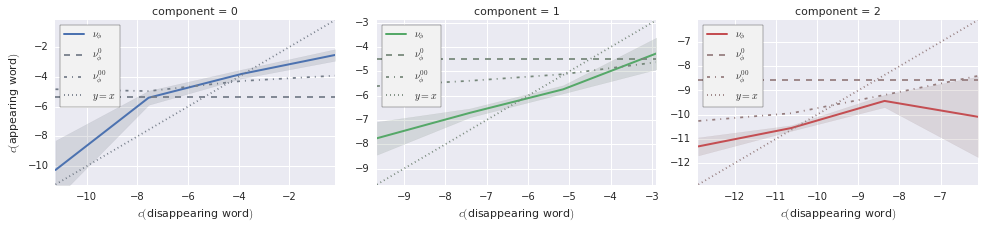

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1353 (cluster-unique) substitutions, but the PCA is in fact computed on 488 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.